# **Superstore - Retail Data Analytics**

![Superstore](https://github.com/harishmuh/superstore-retail-analytics/blob/main/superstore.PNG?raw=true)

## Table of Contents

1. Background
2. Objective
3. Business Understanding
4. Data Understanding
5. Data Preprocessing
6. Explanatory Data Analysis
7. Data visualization

## Background

* Superstore is a retail chain that operates across various regions in the United States. It sells a wide range of products categorized under Furniture, Office Supplies, and Technology.
* The store's customer base includes individual consumers, corporate clients, and home offices. The superstore dataset provides a comprehensive view of sales and performance metrics for a retail superstore over a certain period from January 2017 to December 2020.
* In addition to that, the dataset encompasses information on orders, products, customers, and shipping details, offering a good source of insights for data analysis.
* We will delve into total order patterns, evaluate sales and profit trends, gain geographical insights, and analyze product performance to inform decision-makers about potential areas for improvement and optimization


### Objective

The primary objective of our analysis is to uncover critical insights across key factors, offering actionable recommendations to enhance the Superstore's operations. These key factors can be divided as
1. Sales Performance: Evaluate the overall sales performance, identify top-selling products, and understand the impact of different product categories on revenue.
2. Geographic Insights: Examine sales distribution across different regions to highlight the  identify potential growth areas and areas that may require additional attention.
3. Product Insights: Investigate product-specific metrics, such as popularity, profitability, and stock levels, to optimize inventory management and product offerings.

## Data Understanding

### Library Used

  1. Pandas
  2. Numpy
  3. Matplotlib
  4. Seaborn
  5. Missingno

**Importing libraries**

In [168]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mo
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Customizing with 'ggplot' style
plt.style.use('ggplot')

### Data Review and Preparation

**Importing and displaying dataset**

In [169]:
# Loading superstore dataset
# Displaying the first rows of dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSxn1GAM-NPM5WO3FqJntWLThMpEudwikO9PLI2FwSuhzq7gzIE7C-JQaEWPY4AAGksuFPg_G3IQg-L/pub?output=csv')
df.head(6)


,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
5,CA-2017-115812,BH-11710,90032,FUR-FU-10001487,48.8600,7,0.00,14.1694,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",6/9/2017,6/14/2017,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West


In [170]:
# Displaying the last rows of dataset
df.tail(6)

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
9988,CA-2020-163629,RA-19885,30605,TEC-PH-10004006,206.100,5,0.0,55.6470,Technology,Phones,Panasonic KX - TS880B Telephone,11/17/2020,11/21/2020,Standard Class,Ruben Ausman,Corporate,United States,Athens,Georgia,South
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,25.248,3,0.2,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,1/21/2017,1/23/2017,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,91.960,2,0.0,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,258.576,2,0.2,19.3932,Technology,Phones,Aastra 57i VoIP phone,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,29.600,4,0.0,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9993,CA-2020-119914,CC-12220,92683,OFF-AP-10002684,243.160,2,0.0,72.9480,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection",5/4/2020,5/9/2020,Second Class,Chris Cortes,Consumer,United States,Westminster,California,West


In [171]:
# Reviewing the dimension of the data
df.shape

(9994, 20)

The data frame contains 9994 rows and 20 columns

In [172]:
# Columns in the dataset
df.columns

Index(['Order_ID', 'Customer_ID', 'Postal_Code', 'Product_ID', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Category', 'Sub-Category',
       'Product_Name', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name',
       'Segment', 'Country/Region', 'City', 'State', 'Region'],
      dtype='object')

In [173]:
# Unique value in the Category column
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [174]:

# Unique value in the Sub-Category column
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [175]:
# Unique value in the Segment column
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [176]:
# Number of products in each category
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [177]:
# Total number of products in all categories
df["Category"].value_counts().sum()

9994

In [178]:
# Number of Sub-category products are divided
df["Sub-Category"].nunique()

17

In [179]:
# Number of products in each sub-category
df["Sub-Category"].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [180]:
# Types of regions
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [181]:
# Type of states
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [182]:
# Number of orders in each state
df["State"].value_counts().to_frame()

,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


In [183]:
# Types of cities
df["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [184]:
# Total number of customer address
len(df["City"].unique())

531

In [185]:
# Types of ship modes
df["Ship_Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [186]:
# Number of unique values in each column
df.nunique().to_frame(name="Unique Values")

,Unique Values
Order_ID,5009
Customer_ID,793
Postal_Code,632
Product_ID,1862
Sales,5825
Quantity,14
Discount,12
Profit,7287
Category,3
Sub-Category,17


In [187]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [188]:
# Types of data
df.dtypes.to_frame(name="Data Types")

,Data Types
Order_ID,object
Customer_ID,object
Postal_Code,int64
Product_ID,object
Sales,float64
Quantity,int64
Discount,float64
Profit,float64
Category,object
Sub-Category,object


The description of each columns from Superstore data can be seen as below


*   **Order ID**    : Unique Order ID for each Customer.
*   **Customer ID** : Unique ID to identify each Customer.
*   **Postal Code** : Postal Code of every Customer.
*   **Product ID**  : Unique ID of the Product.
*   **Sales**       : Sales of the Product.
*   **Quantity**    : Quantity of the Product.
*   **Discount**  : Discount provided.
*   **Profit**  : Profit/Loss incurred.
*   **Category**  : Category of the product ordered.
*   **Sub-Category** : Sub-Category of the product ordered.
*   **Product Name**  : Name of the Product.
*   **Order Date**  : Order Date of the product.
*   **Ship Date** : Shipping Date of the Product.
*   **Ship Mod** : Shipping Mode specified by the Customer.
*   **Customer Name** : Name of the Customer.
*   **Segment** : The segment where the Customer belongs.
*   **Country** : The Country of residence of the Customer.
*   **City** : The City where Customer live.
*   **State** : The state of residence of the Customer.
*   **Region** : The Region where the Customer belong.























**Dropping the unnecessary columns**

In [189]:
# Dropping Postal Code column
df = df.drop(columns=["Postal_Code"])

**Changing the time format**

In [190]:
# Reformating the data type of Order_Date and Ship_Date columns into datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

### Statistical description

**Statistical description of the data**

In [191]:
# Statistical summary of the numerical data
df.describe()

,Sales,Quantity,Discount,Profit,Order_Date,Ship_Date
count,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994
mean,229.858001,3.789574,0.156203,28.656896,2019-04-30 17:41:20.448268800,2019-05-04 16:42:15.921553152
min,0.444000,1.000000,0.000000,-6599.978000,2017-01-03 00:00:00,2017-01-07 00:00:00
25%,17.280000,2.000000,0.000000,1.728750,2018-05-23 00:00:00,2018-05-27 00:00:00
50%,54.490000,3.000000,0.200000,8.666500,2019-06-26 00:00:00,2019-06-29 00:00:00
75%,209.940000,5.000000,0.200000,29.364000,2020-05-14 00:00:00,2020-05-18 00:00:00
max,22638.480000,14.000000,0.800000,8399.976000,2020-12-30 00:00:00,2021-01-05 00:00:00
std,623.245101,2.225110,0.206452,234.260108,NaN,NaN


The description of the rows above can be found below:

*   **Count** : The counted number of values in the specified column(s).
*   **Mean** : The mean (average) of the values in the specified column(s).
*   **std** : The standard deviation of the values in the specified column(s).
*   **Min** : Returns the minimum value in the specified column(s).
*   **25%** : The first quartile (Q1) or 25th percentile in the specified column(s).
*   **50%** : The second quartile (Q2, or the median) is the 50th percentile in the specified column(s)
*   **75%** : the 75th percentile as the third quartile (Q3) in the specified column (s).
*   **Max** : Returns the maximum value in the specified column(s).


In [192]:
# Statistical summary of the non-numerical data
df.describe(include=['O'])

,Order_ID,Customer_ID,Product_ID,Category,Sub-Category,Product_Name,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,1862,3,17,1817,4,793,3,1,531,49,4
top,CA-2020-100111,WB-21850,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,Standard Class,William Brown,Consumer,United States,New York City,California,West
freq,14,37,19,6026,1523,48,5968,37,5191,9994,915,2001,3203


## Data Preprocessing (Data Cleaning)

### Handling Missing Values

**Total number of missing values**

In [193]:
# Calculating the number of missing values
df.isnull().sum().to_frame(name="Missing Values")

,Missing Values
Order_ID,0
Customer_ID,0
Product_ID,0
Sales,0
Quantity,0
Discount,0
Profit,0
Category,0
Sub-Category,0
Product_Name,0


In [194]:
# Calculating the percentage of the missing values to all data
(df.isnull().sum() / (len(df) * 100)).to_frame(name="Missing Values")

,Missing Values
Order_ID,0.0
Customer_ID,0.0
Product_ID,0.0
Sales,0.0
Quantity,0.0
Discount,0.0
Profit,0.0
Category,0.0
Sub-Category,0.0
Product_Name,0.0


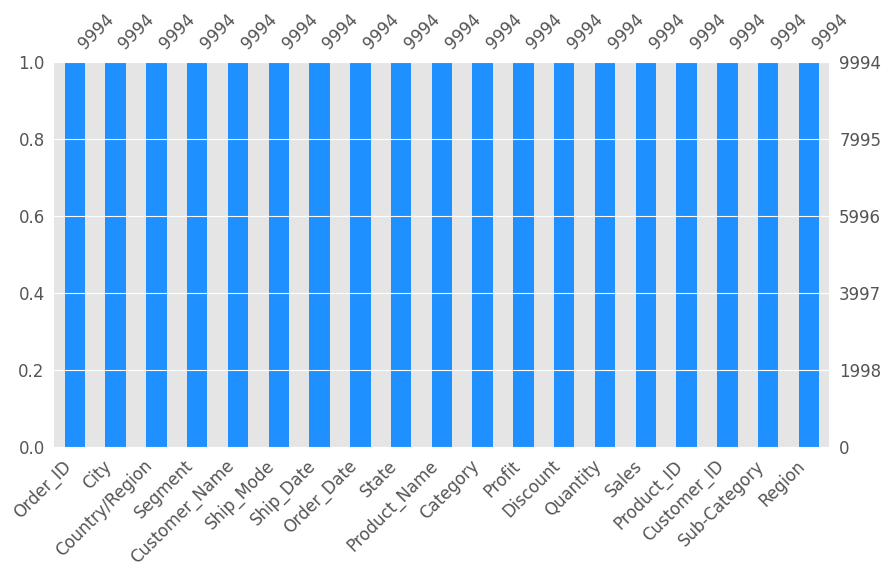

In [195]:
# Visualization of missing values
mo.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

No missing values were observed in the dataset

### Handling duplicated data

**Duplicate data check**

In [196]:
# Duplicated data check
print(df[df.duplicated()] == True)

      Order_ID  Customer_ID  Product_ID  Sales  Quantity  Discount  Profit  \
3406     False        False       False  False     False     False   False   

      Category  Sub-Category  Product_Name  Order_Date  Ship_Date  Ship_Mode  \
3406     False         False         False       False      False      False   

      Customer_Name  Segment  Country/Region   City  State  Region  
3406          False    False           False  False  False   False  


In [197]:
df.duplicated().sum()

1

**Drop duplicate**

In [198]:
df.drop_duplicates()

,Order_ID,Customer_ID,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,FUR-FU-10001889,25.2480,3,0.20,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,2017-01-21,2017-01-23,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,FUR-FU-10000747,91.9600,2,0.00,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,2020-02-26,2020-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,TEC-PH-10003645,258.5760,2,0.20,19.3932,Technology,Phones,Aastra 57i VoIP phone,2020-02-26,2020-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,OFF-PA-10004041,29.6000,4,0.00,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2020-02-26,2020-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West


## Explanatory Data Analysis

In [199]:
# defining numerical and categorical columns
numerical = [var for var in df.columns if df[var].dtypes not in ['object']]
categorical = [var for var in df.columns if df[var].dtypes in ['object']]

pd.set_option('max_colwidth', None)
pd.DataFrame({
    "Column Type":["Categorical","Numerical"],
    "Columns":[categorical, numerical]
})

,Column Type,Columns
0,Categorical,"[Order_ID, Customer_ID, Product_ID, Category, Sub-Category, Product_Name, Ship_Mode, Customer_Name, Segment, Country/Region, City, State, Region]"
1,Numerical,"[Sales, Quantity, Discount, Profit, Order_Date, Ship_Date]"


### Numerical

**Data Distribution**

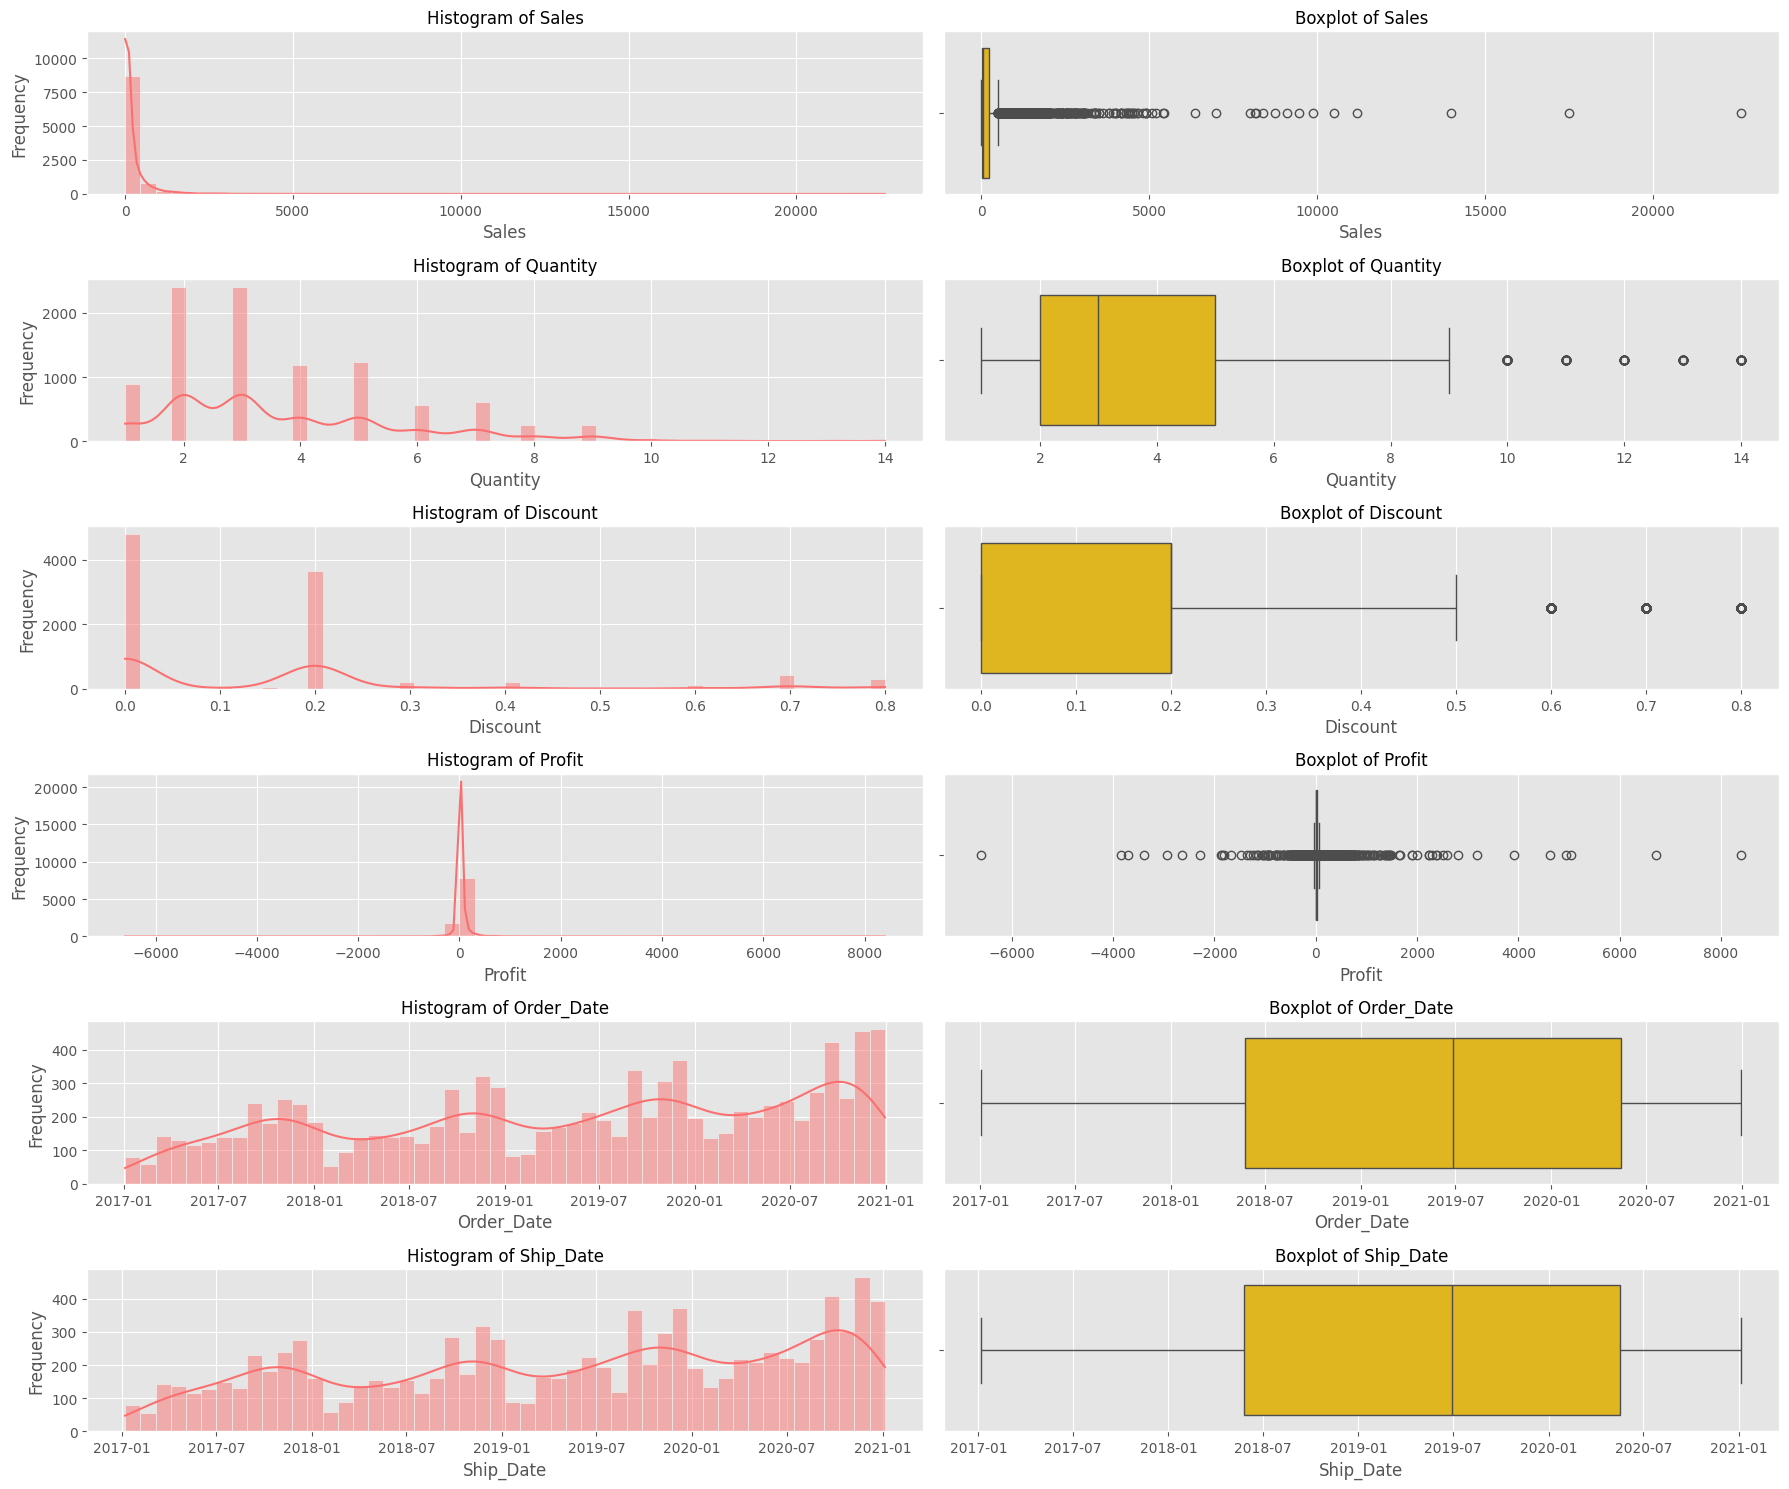

In [200]:
# Data distribution

plt.figure(figsize=(18, 15))

numerical = [var for var in df.columns if df[var].dtypes not in ['object']]

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=df[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [201]:
# Data Distribution

numerical = [var for var in df.columns if df[var].dtypes not in ['object', 'datetime64[ns]']] # Exclude datetime columns

from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name].dropna())

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Sales,18033.308498,0.0,Not Normally Distributed
1,Quantity,2148.018022,0.0,Not Normally Distributed
2,Discount,2977.822121,0.0,Not Normally Distributed
3,Profit,14363.736244,0.0,Not Normally Distributed


**Correlation among the columns**

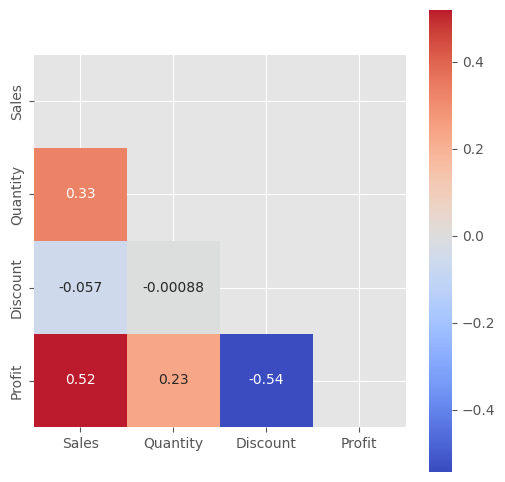

In [202]:
# Correlation between columns
# Select numerical columns
numerical = df.select_dtypes(include=np.number)

# Correlation between features
plt.figure(figsize=(6, 6))

matrix = np.triu(numerical.corr(method='spearman'))

sns.heatmap(data=numerical.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask=matrix, square=True)
plt.show()

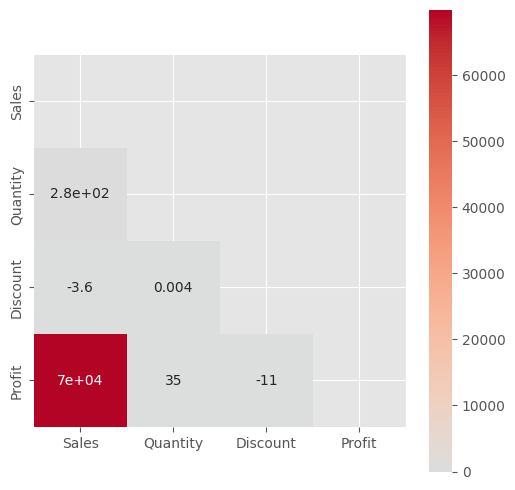

In [203]:
# Covariance between columns
# Select numerical columns
numerical = df.select_dtypes(include=np.number)

# Covariance between features
plt.figure(figsize=(6, 6))

matrix = np.triu(numerical.cov())

sns.heatmap(data=numerical.cov(), annot=True, cmap='coolwarm', center=0, mask=matrix, square=True)
plt.show()

In [204]:
# Data slicing
# Reviewing first row
df.iloc[0].to_frame(name="value")

,value
Order_ID,CA-2019-152156
Customer_ID,CG-12520
Product_ID,FUR-BO-10001798
Sales,261.96
Quantity,2
Discount,0.0
Profit,41.9136
Category,Furniture
Sub-Category,Bookcases
Product_Name,Bush Somerset Collection Bookcase


In [205]:
# Reviewing the first column
df.iloc[:,0]

0       CA-2019-152156
1       CA-2019-152156
2       CA-2019-138688
3       US-2018-108966
4       US-2018-108966
             ...      
9989    CA-2017-110422
9990    CA-2020-121258
9991    CA-2020-121258
9992    CA-2020-121258
9993    CA-2020-119914
Name: Order_ID, Length: 9994, dtype: object

### Categorical

In [206]:
# Defining categorical columns
categorical = [var for var in df.columns if df[var].dtypes in ['object']]

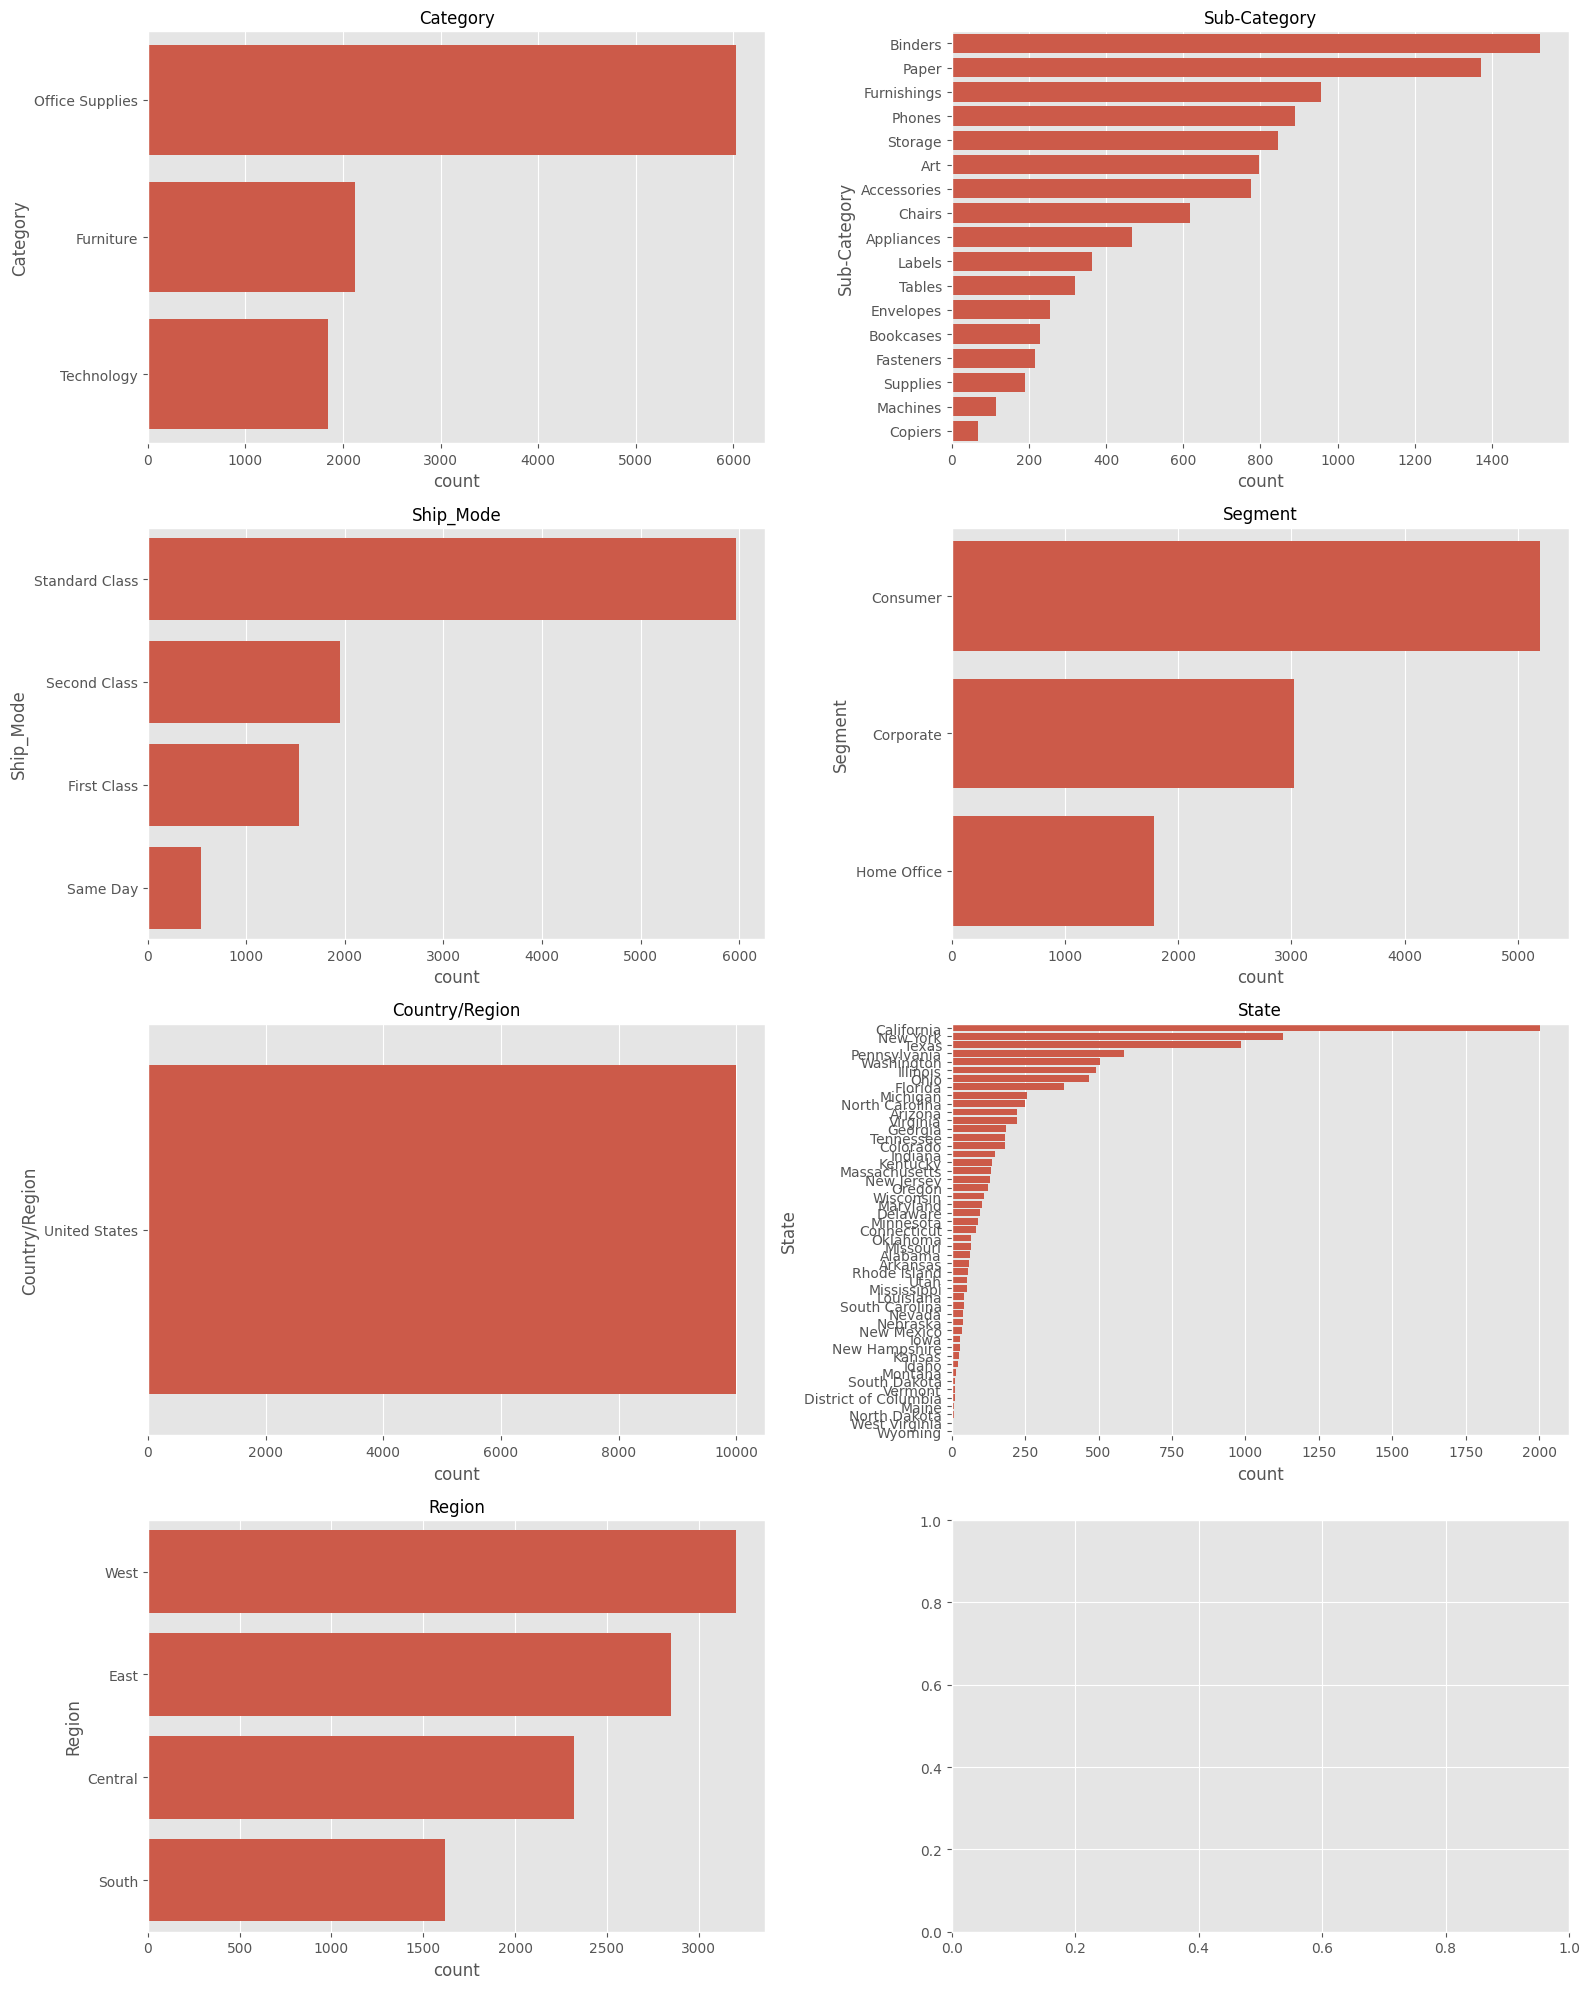

In [207]:
# Visualization of categorical columns based on their uniques

# We want to exclude the Order_ID, Customer_ID, Product_ID, Product_Name, City, and Customer_Name
categorical_visual = [var for var in categorical if var not in ['Order_ID', 'Customer_ID', 'Product_ID', 'Product_Name', 'City', 'Customer_Name']]

# Creating visualization
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
for i, j in zip(categorical_visual, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'{i}', size = 12)

plt.tight_layout()
plt.show()

In [208]:
# Summarizing data
# Initial assessment
# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Check data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_value_sum': df.isna().sum(),
    'missing_value_pct': round((df.isna().sum() / len(df)) * 100, 2),
    'negative_value': [(df[col] < 0).any() if df[col].dtype in ['int64', 'float64'] else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

assessment_data

feature       data_type  missing_value_sum  \
Order_ID              Order_ID          object                  0   
Customer_ID        Customer_ID          object                  0   
Product_ID          Product_ID          object                  0   
Sales                    Sales         float64                  0   
Quantity              Quantity           int64                  0   
Discount              Discount         float64                  0   
Profit                  Profit         float64                  0   
Category              Category          object                  0   
Sub-Category      Sub-Category          object                  0   
Product_Name      Product_Name          object                  0   
Order_Date          Order_Date  datetime64[ns]                  0   
Ship_Date            Ship_Date  datetime64[ns]                  0   
Ship_Mode            Ship_Mode          object                  0   
Customer_Name    Customer_Name          object                  0   
Segment                Segment          object                  0   
Country/Region  Country/Region          object                  0   
City                      City          object                  0   
State                    State          object                  0   
Region                  Region          object                  0   

                missing_value_pct  negative_value  n_unique  \
Order_ID                      0.0           False      5009   
Customer_ID                   0.0           False       793   
Product_ID                    0.0           False      1862   
Sales                         0.0           False      5825   
Quantity                      0.0           False        14   
Discount                      0.0           False        12   
Profit                        0.0            True      7287   
Category                      0.0           False         3   
Sub-Category                  0.0           False        17   
Product_Name                  0.0           False      1817   
Order_Date                    0.0           False      1236   
Ship_Date                     0.0           False      1334   
Ship_Mode                     0.0           False         4   
Customer_Name                 0.0           False       793   
Segment                       0.0           False         3   
Country/Region                0.0           False         1   
City                          0.0           False       531   
State                         0.0           False        49   
Region                        0.0           False         4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Data Analysis

### Sales and profit trend

In [209]:
# Preparation of time series analysis data
# Creating monthly sales and profit table

# Converting order date data into year and month
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month

# Grouping data by 'year' and 'month' and calculating the total sales and profit
# Use a list to select multiple columns
month_sales_profit = df.groupby(['year','month'])[['Sales', 'Profit']].sum().reset_index()

# Preparation of monthly sales and profit
month_sales_profit = df.groupby(['year','month'])[['Sales', 'Profit']].sum().reset_index()

month_sales_profit

,year,month,Sales,Profit
0,2017,1,14236.8950,2450.1907
1,2017,2,4519.8920,862.3084
2,2017,3,55691.0090,498.7299
3,2017,4,28295.3450,3488.8352
4,2017,5,23648.2870,2738.7096
5,2017,6,34595.1276,4976.5244
6,2017,7,33946.3930,-841.4826
7,2017,8,27909.4685,5318.1050
8,2017,9,81777.3508,8328.0994
9,2017,10,31453.3930,3448.2573


From the beginning (2017-01) to the end (2020-12), there were sales and profit  increase up to 588,8% and 346.2%

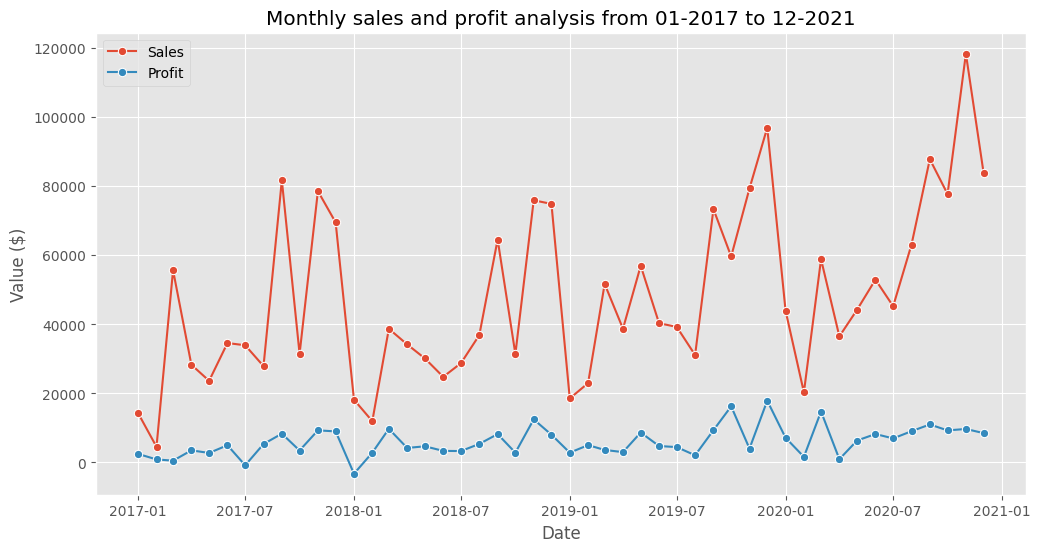

In [210]:
# Time series sales and profit analysis

# Converting the 'year' and 'month' columns to datetime format
month_sales_profit['date'] = pd.to_datetime(month_sales_profit[['year', 'month']].assign(day=1))

# Setting the index of the DataFrame to the 'date' column
month_sales_profit.set_index('date', inplace=True)

# Plotting the line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_sales_profit, x=month_sales_profit.index, y='Sales', marker='o', linestyle='-', label='Sales')
sns.lineplot(data=month_sales_profit, x=month_sales_profit.index, y='Profit', marker='o', linestyle='-', label='Profit')

# Adding title and labels
plt.title('Monthly sales and profit analysis from 01-2017 to 12-2021')
plt.xlabel('Date')
plt.ylabel('Value ($)')

# Displaying legend
plt.legend()

# Displaying grid
plt.grid(True)

# Displaying the plot
plt.show()

Noticeable yearly pattern of sales increase to the peak, 4th quarter, between October and December

### Shipping mode




**Number of order per ship mode**

In [211]:
# Number of orders per ship mode
df['Ship_Mode'].value_counts()

Ship_Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

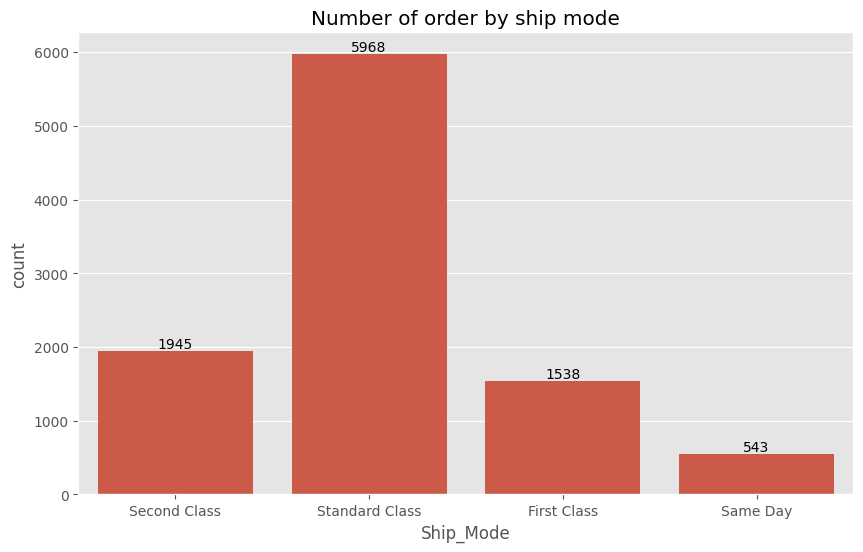

In [212]:
# Bar chart of order per ship mode

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts and adding value
ax = sns.countplot(df, x='Ship_Mode')

# Adding title and labels
plt.title('Number of order by ship mode')
plt.ylabel('count')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Displaying bar charts
plt.show()

**Percentage of shipping mode**

In [213]:
# Percentage of ship mode in overall order
df_shipmode = df['Ship_Mode'].value_counts()/len(df['Ship_Mode']) * 100
df_shipmode

Ship_Mode
Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: count, dtype: float64

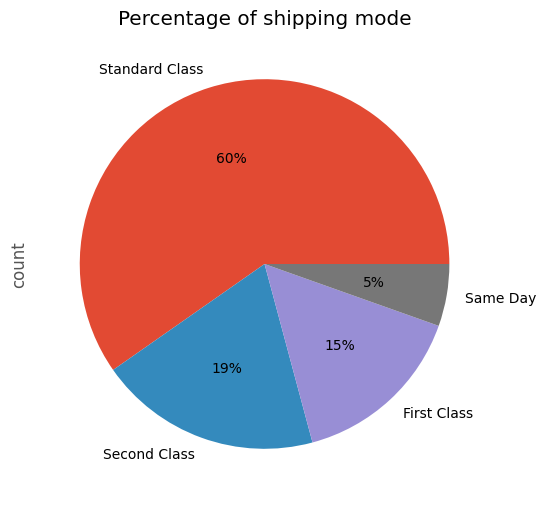

In [214]:
# Pie chart of ship mode percentage

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating pie charts and adding value
df_shipmode.plot.pie(autopct='%.0f%%')

# Adding title
plt.title('Percentage of shipping mode')

# Displaying pie charts
plt.show()

The most popular shipping mode is the standard class

### Category

**Number of order per category**

In [215]:
# Number of orders per category
df_category = df['Category'].value_counts()
df_category

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

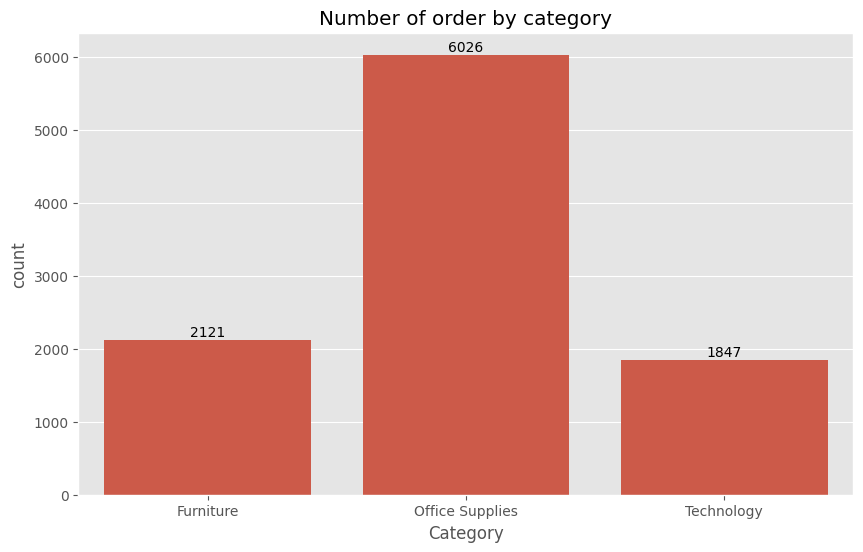

In [216]:
# Bar chart of order per category

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts and adding value
ax = sns.countplot(df, x='Category')

# Adding title and labels
plt.title('Number of order by category')
plt.ylabel('count')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Displaying bar charts
plt.show()

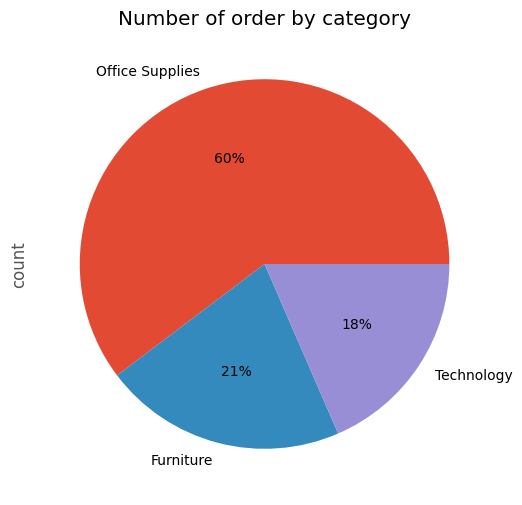

In [217]:
# Number of order by category

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating pie charts and adding value
df_category.plot.pie(autopct='%.0f%%')

# Adding title
plt.title('Number of order by category')

# Displaying pie charts
plt.show()

Office supplies was the most popular category of order

**Sales performances per category**

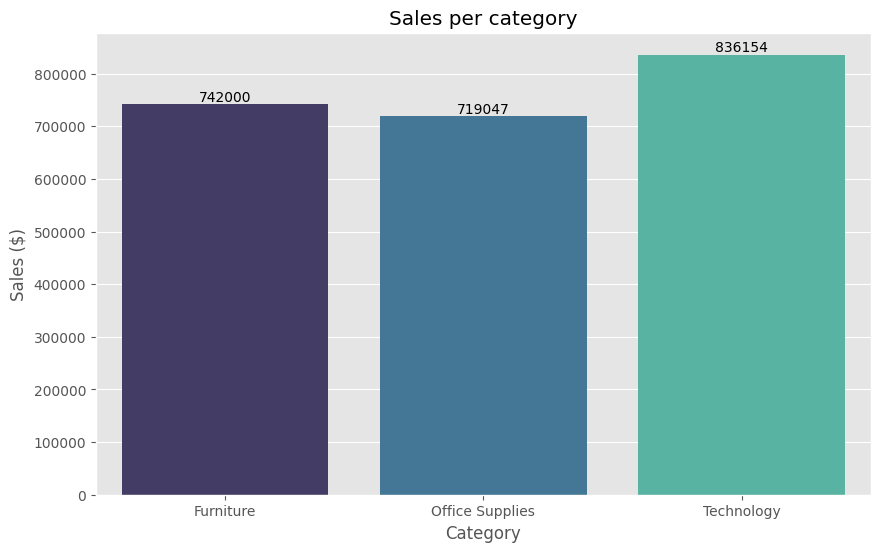

In [218]:
# Sales per category

# Grouping sales data by category
df_sum = df.groupby(by=['Category'], as_index=False).agg({"Sales":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['Category'], y=df_sum['Sales'], palette = 'mako')

# Adding titles, labels, and bar labels
plt.title('Sales per category')
plt.ylabel('Sales ($)')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Displaying bar charts
plt.show()

**Profit performance per category**

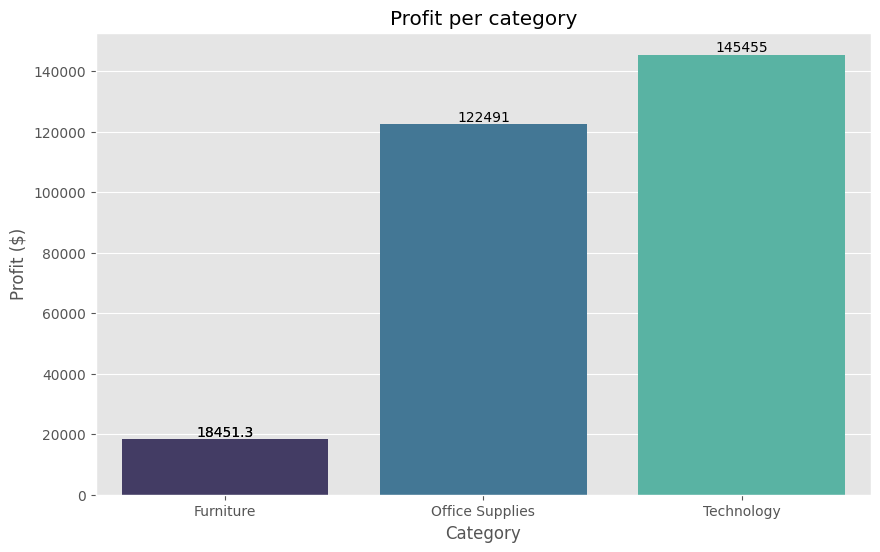

In [219]:
# Profit per category

# Grouping sales data by category
df_sum = df.groupby(by=['Category'], as_index=False).agg({"Profit":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['Category'], y=df_sum['Profit'], palette = 'mako')

# Adding titles, labels, and bar labels
plt.title('Profit per category')
plt.ylabel('Profit ($)')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Displaying bar charts
plt.show()

**Sales and profit performances per category**

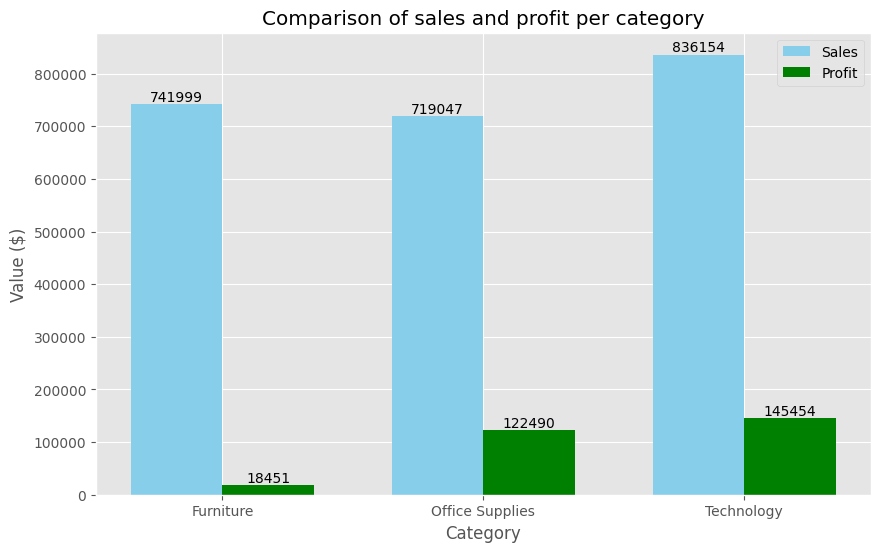

In [220]:
# Comparison of sales and profit per category

# Grouping sales and profit data by category
df_sum = df.groupby(by=['Category'], as_index=False).agg({"Sales": "sum", "Profit": "sum"}).reset_index()

# Setting the width and position of bars
bar_width = 0.35
bar_positions_sales = np.arange(len(df_sum['Category']))
bar_positions_profit = bar_positions_sales + bar_width

# Setting the width and height of figure
plt.figure(figsize=(10, 6))

# Creating bar chart for Sales
sales_bars = plt.bar(bar_positions_sales, df_sum['Sales'], width=bar_width, label='Sales', color='skyblue')

# Creating bar chart for Profit
profit_bars = plt.bar(bar_positions_profit, df_sum['Profit'], width=bar_width, label='Profit', color='green')

# Adding titles, labels, and bar labels
plt.title('Comparison of sales and profit per category')
plt.ylabel('Value ($)')
plt.xlabel('Category')
plt.xticks(bar_positions_sales + bar_width / 2, df_sum['Category'])
plt.legend()

# Iterate through each bar to label all bars
for bar in sales_bars + profit_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

# Displaying bar charts
plt.show()

The category of technology contributes to the highest value of sales and the most profitable

**Sales and profit performances per category between regions**

In [221]:
# Pivot table for Profit and Sales based on category and region
cat_profit_sales_reg = pd.pivot_table(data=df,
                                      index=['Category', 'Region'],
                                      values=['Profit', 'Sales'],
                                      aggfunc='sum'
)

# Displaying the resulting pivot table
cat_profit_sales_reg

Profit        Sales
Category        Region                          
Furniture       Central  -2871.0494  163797.1638
                East      3046.1658  208291.2040
                South     6771.2061  117298.6840
                West     11504.9503  252612.7435
Office Supplies Central   8879.9799  167026.4150
                East     41014.5791  205516.0550
                South    19986.3928  125651.3130
                West     52609.8490  220853.2490
Technology      Central  33697.4320  170416.3120
                East     47462.0351  264973.9810
                South    19991.8314  148771.9080
                West     44303.6496  251991.8320

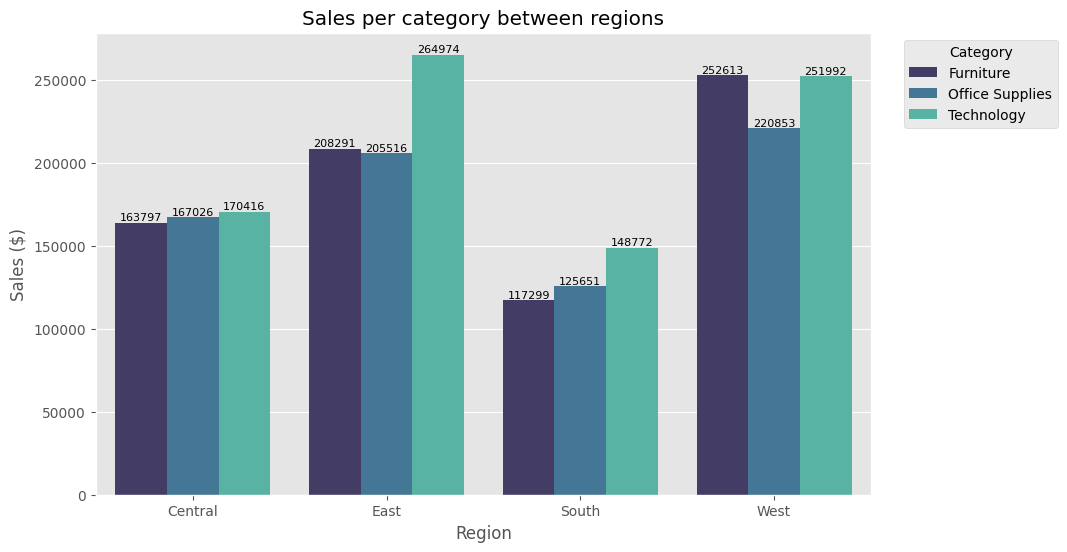

In [222]:
# Sales per category between region

# Grouping sales data by category and region
df_sum = df.groupby(by=['Category', 'Region'], as_index=False).agg({"Sales":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(data = df_sum, x = 'Region', y = 'Sales', hue='Category', palette = 'mako')

# Adding titles, labels, and legends
plt.title('Sales per category between regions')
plt.ylabel('Sales ($)')
plt.xlabel('Region')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', title='Category')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# Displaying bar charts
plt.show()

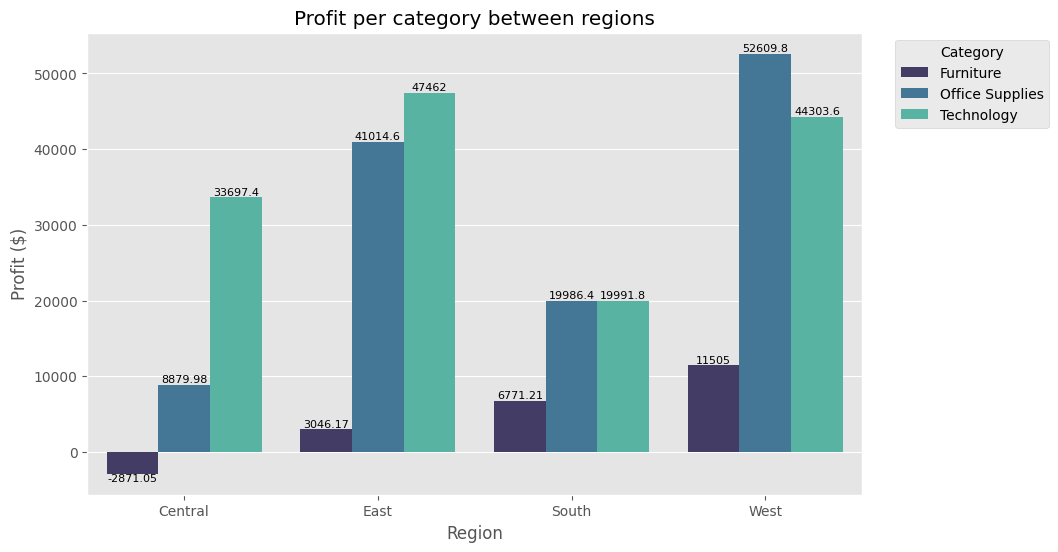

In [223]:
# Profit per category between region

# Grouping Profit data by category and region
df_sum = df.groupby(by=['Category', 'Region'], as_index=False).agg({"Profit":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(data = df_sum, x = 'Region', y = 'Profit', hue='Category', palette = 'mako')

# Adding titles, labels, and legends
plt.title('Profit per category between regions')
plt.ylabel('Profit ($)')
plt.xlabel('Region')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', title='Category')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# Displaying bar charts
plt.show()

### Market segment

**Number of order per market segment**

In [224]:
# Number of orders per market segment
df_segment = df['Segment'].value_counts()
df_segment

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

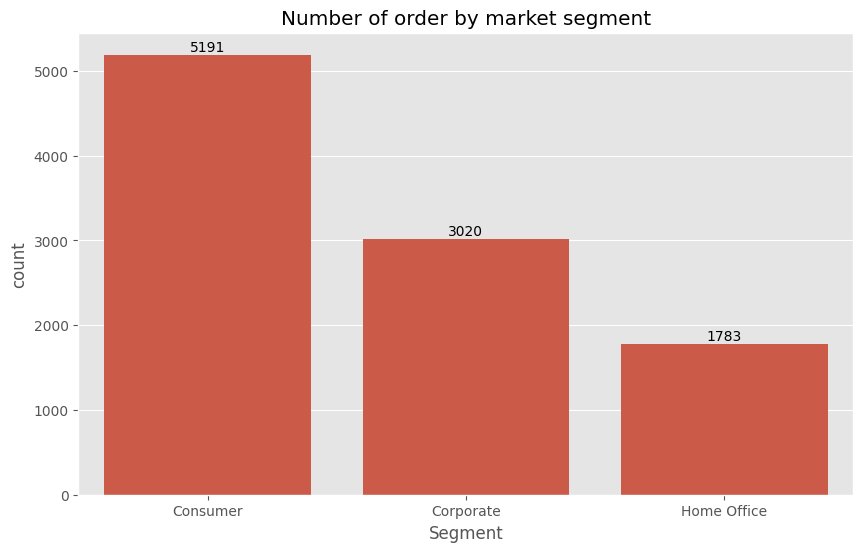

In [225]:
# Bar chart of order per market segment

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts and adding value
ax = sns.countplot(df, x='Segment')

# Adding title and labels
plt.title('Number of order by market segment')
plt.ylabel('count')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Displaying bar charts
plt.show()

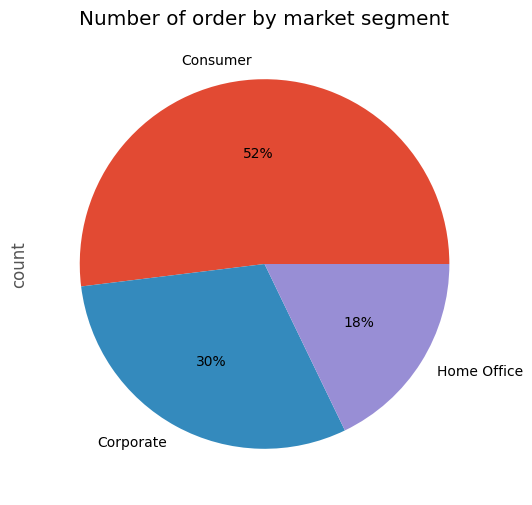

In [226]:
# Number of order by market segment

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating pie charts and adding value
df_segment.plot.pie(autopct='%.0f%%')

# Adding title
plt.title('Number of order by market segment')

# Displaying pie charts
plt.show()

The highest number of order was dominated by private consumer segment

**Sales performance per market segment**

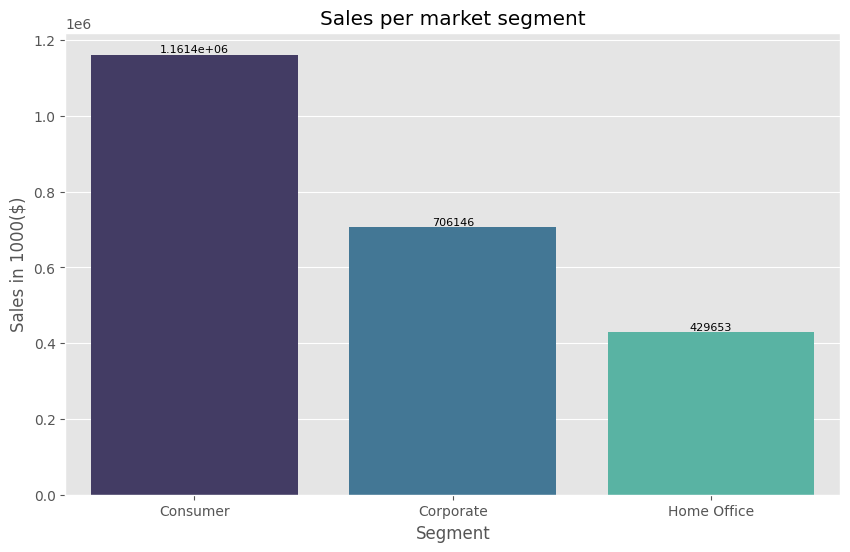

In [227]:
# Sales per market segment

# Grouping sales data by market segment
df_sum = df.groupby(by=['Segment'], as_index=False).agg({"Sales":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['Segment'], y=df_sum['Sales'], palette = 'mako')

# Adding titles, labels, and bar labels
plt.title('Sales per market segment')
plt.ylabel('Sales in 1000($)')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# Displaying bar charts
plt.show()

**Profit performance per market segment**

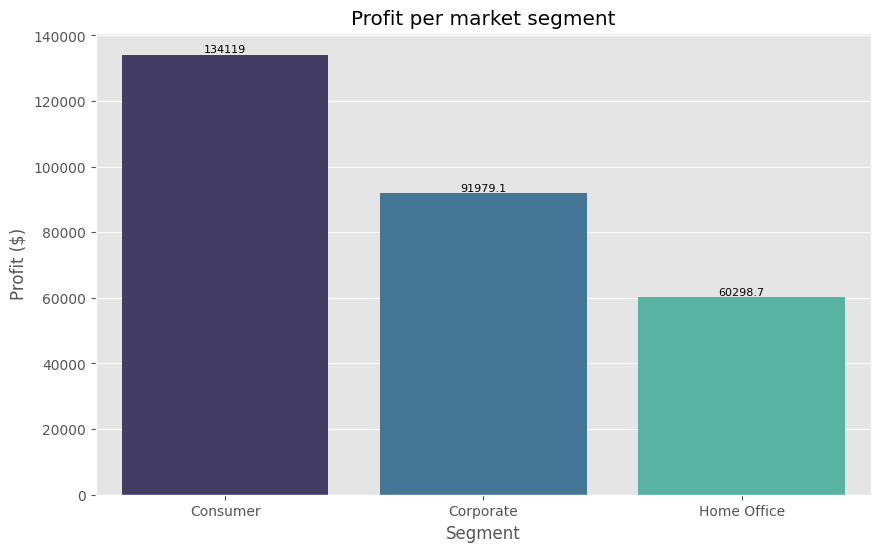

In [228]:
# Profit per market segment

# Grouping profit data by market segment
df_sum = df.groupby(by=['Segment'], as_index=False).agg({"Profit":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['Segment'], y=df_sum['Profit'], palette = 'mako')

# Adding titles, labels, and bar labels
plt.title('Profit per market segment')
plt.ylabel('Profit ($)')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# Displaying bar charts
plt.show()

**Sales and profit performance per market segment**

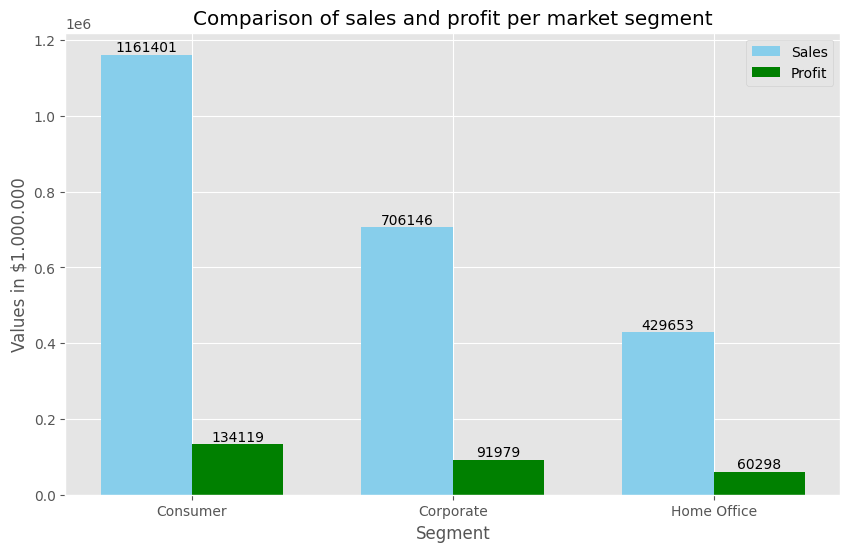

In [229]:
# Comparison of sales and profit per market segment

# Grouping sales and profit data by segment
df_sum = df.groupby(by=['Segment'], as_index=False).agg({"Sales": "sum", "Profit": "sum"}).reset_index()

# Setting the width and position of bars
bar_width = 0.35
bar_positions_sales = np.arange(len(df_sum['Segment']))
bar_positions_profit = bar_positions_sales + bar_width

# Setting the width and height of figure
plt.figure(figsize=(10, 6))

# Creating bar chart for Sales
sales_bars = plt.bar(bar_positions_sales, df_sum['Sales'], width=bar_width, label='Sales', color='skyblue')

# Creating bar chart for Profit
profit_bars = plt.bar(bar_positions_profit, df_sum['Profit'], width=bar_width, label='Profit', color='green')

# Adding titles, labels, and bar labels
plt.title('Comparison of sales and profit per market segment')
plt.ylabel('Values in $1.000.000')
plt.xlabel('Segment')
plt.xticks(bar_positions_sales + bar_width / 2, df_sum['Segment'])
plt.legend()

# Iterate through each bar to label all bars
for bar in sales_bars + profit_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

# Displaying bar charts
plt.show()


The market segment of private consumer generated the highest sales and profit of superstore

**Sales and profit performances per market segment between regions**

In [230]:
# Pivot table for Profit and Sales based on market segment and region
seg_profit_sales_reg = pd.pivot_table(data=df,
                                      index=['Segment', 'Region'],
                                      values=['Profit', 'Sales'],
                                      aggfunc='sum')

# Displaying the resulting pivot table
seg_profit_sales_reg

Profit        Sales
Segment     Region                          
Consumer    Central   8564.0481  252031.4340
            East     41190.9843  350908.1670
            South    26913.5728  195580.9710
            West     57450.6040  362880.7730
Corporate   Central  18703.9020  157995.8128
            East     23622.5789  200409.3470
            South    15215.2232  121885.9325
            West     34437.4299  225855.2745
Home Office Central  12438.4124   91212.6440
            East     26709.2168  127463.7260
            South     4620.6343   74255.0015
            West     16530.4150  136721.7770

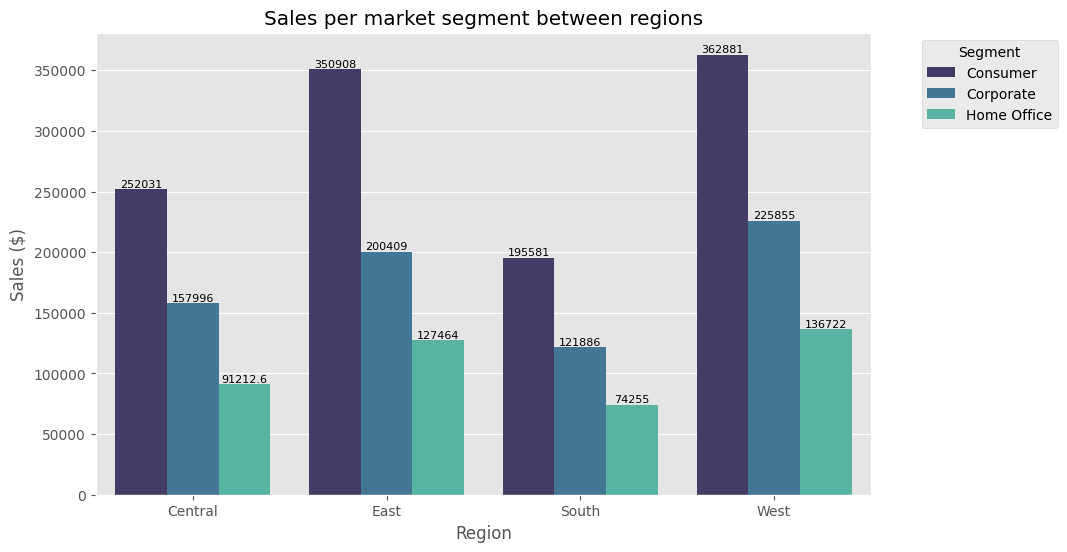

In [231]:
# Grouping sales data by market segment and region
df_sum = df.groupby(by=['Segment', 'Region'], as_index=False).agg({"Sales":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(data = df_sum, x = 'Region', y = 'Sales', hue='Segment', palette = 'mako')

# Adding titles, labels, and legends
plt.title('Sales per market segment between regions')
plt.ylabel('Sales ($)')
plt.xlabel('Region')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', title='Segment')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# Displaying bar charts
plt.show()

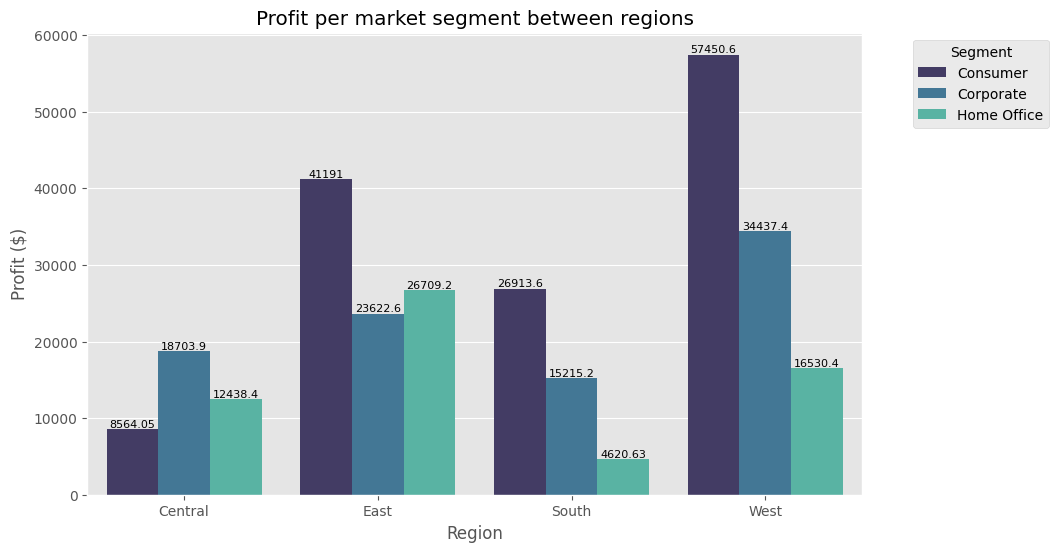

In [232]:
# Grouping profit data by market segment and region
df_sum = df.groupby(by=['Segment', 'Region'], as_index=False).agg({"Profit":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(data = df_sum, x = 'Region', y = 'Profit', hue='Segment', palette = 'mako')

# Adding titles, labels, and legends
plt.title('Profit per market segment between regions')
plt.ylabel('Profit ($)')
plt.xlabel('Region')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', title='Segment')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# Displaying bar charts
plt.show()

In [233]:
# Sales based on category per region and segment ####belum tau dimana
sub_cat_sales_pv = pd.pivot_table(data=df,
               index=['Category'],
               columns=['Region','Segment'],
               values='Sales',
               aggfunc='sum')
sub_cat_sales_pv

Region             Central                                East             \
Segment           Consumer   Corporate Home Office    Consumer  Corporate   
Category                                                                    
Furniture        86229.219  52085.6018   25482.343  114211.802  64209.046   
Office Supplies  93111.479  41137.7010   32777.235  101255.136  66474.735   
Technology       72690.736  64772.5100   32953.066  135441.229  69725.566   

Region                           South                                West  \
Segment         Home Office   Consumer   Corporate Home Office    Consumer   
Category                                                                     
Furniture         29870.356  70800.204  29645.0315  16853.4485  119808.087   
Office Supplies   37786.184  59504.581  45930.1700  20216.5620  110080.940   
Technology        59807.186  65276.186  46310.7310  37184.9910  132991.746   

Region                                   
Segment           Corporate Home Office  
Category                                 
Furniture        83080.1065   49724.550  
Office Supplies  77133.8560   33638.453  
Technology       65641.3120   53358.774

In [234]:
# Profit based on category per region and segment ####belum tau dimana
sub_cat_profit_pv = pd.pivot_table(data=df,
               index=['Category'],
               columns=['Region','Segment'],
               values='Profit',
               aggfunc='sum')
sub_cat_profit_pv

Region             Central                                East              \
Segment           Consumer   Corporate Home Office    Consumer   Corporate   
Category                                                                     
Furniture       -3994.4342   2321.9939  -1198.6091   2038.1122    342.1257   
Office Supplies  2583.1432     99.2948   6197.5419  19222.6927  13457.6650   
Technology       9975.3391  16282.6133   7439.4796  19930.1794   9822.7882   

Region                            South                               West  \
Segment         Home Office    Consumer  Corporate Home Office    Consumer   
Category                                                                     
Furniture          665.9279   4616.7326   952.0303   1202.4432   4330.6680   
Office Supplies   8334.2214   9190.1172  8142.6596   2653.6160  25334.3679   
Technology       17709.0675  13106.7230  6120.5333    764.5751  27785.5681   

Region                                   
Segment           Corporate Home Office  
Category                                 
Furniture         3968.6659   3205.6164  
Office Supplies  18527.7008   8747.7803  
Technology       11941.0632   4577.0183

There were some noticeable losses in central region from furniture category

### Region performances

**Number of orders per region**

In [235]:
# Number of orders per region
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

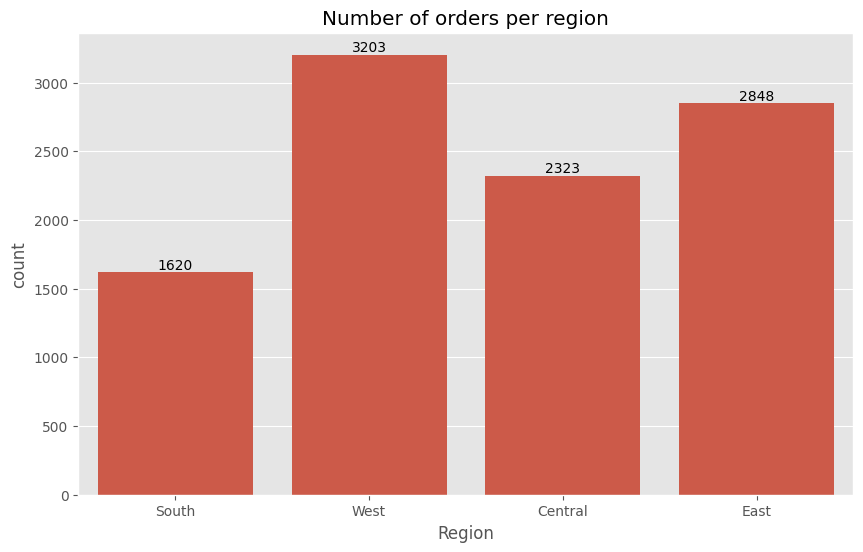

In [236]:
# Bar chart of order per region

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating pie charts and adding value
ax = sns.countplot(df, x='Region')

# Adding title and labels
plt.title('Number of orders per region')
plt.ylabel('count')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Displaying bar charts
plt.show()




**Percentage of orders per region**

In [237]:
# Percentage of order per region
df_region = df['Region'].value_counts()/len(df['Region']) * 100
df_region

Region
West       32.049230
East       28.497098
Central    23.243946
South      16.209726
Name: count, dtype: float64

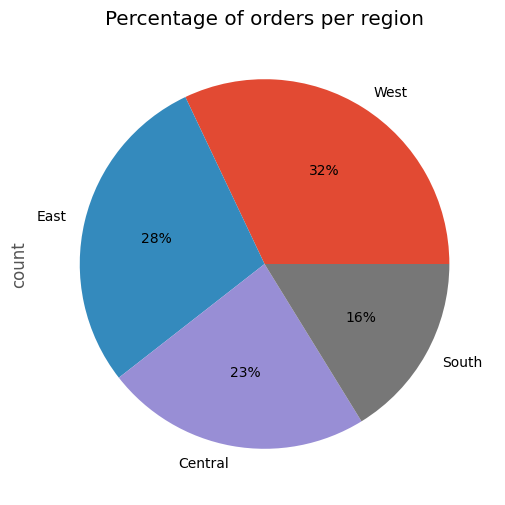

In [238]:
# Pie chart of order per region (in percentage)

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating pie charts and adding value
df_region.plot.pie(autopct='%.0f%%')

# Adding title
plt.title('Percentage of orders per region')

# Displaying pie charts
plt.show()

West region has the most order




**Sales performance per region**

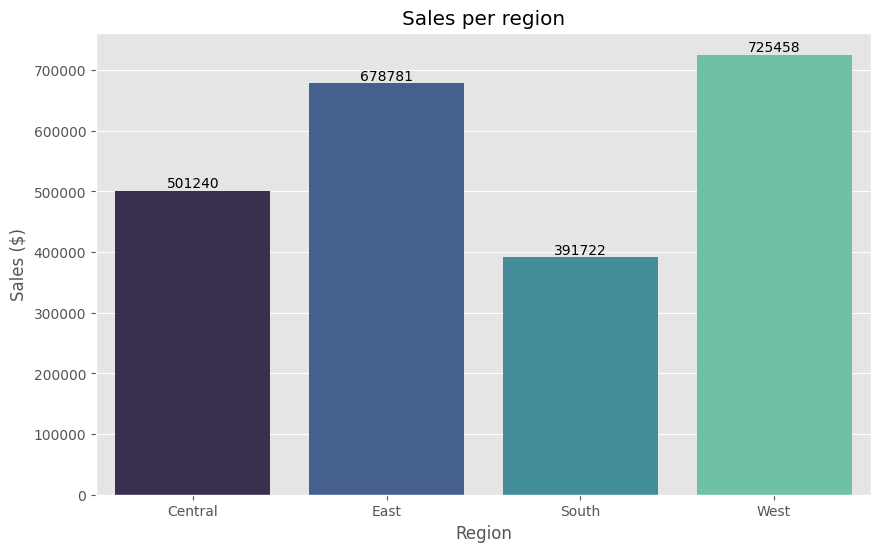

In [239]:
# Sales per region

# Grouping sales data by region
df_sum = df.groupby(by=['Region'], as_index=False).agg({"Sales":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['Region'], y=df_sum['Sales'], palette = 'mako')

# Adding titles, labels, and bar labels
plt.title('Sales per region')
plt.ylabel('Sales ($)')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Displaying bar charts
plt.show()

**Profit performance per region**

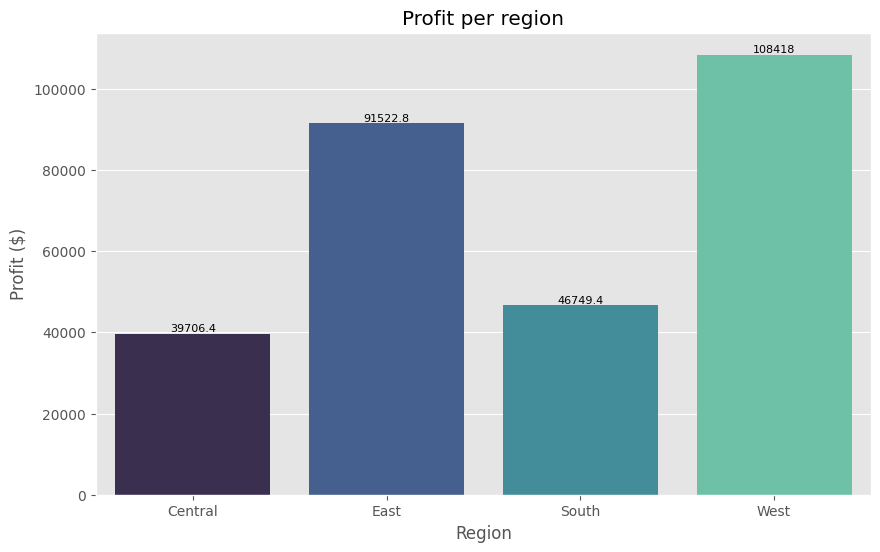

In [240]:
# Profit per region

# Grouping profit data by region
df_sum = df.groupby(by=['Region'], as_index=False).agg({"Profit":sum})

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['Region'], y=df_sum['Profit'], palette = 'mako')

# Adding titles, labels, and bar labels
plt.title('Profit per region')
plt.ylabel('Profit ($)')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# Displaying bar charts
plt.show()

**Sales and profit performance per region**

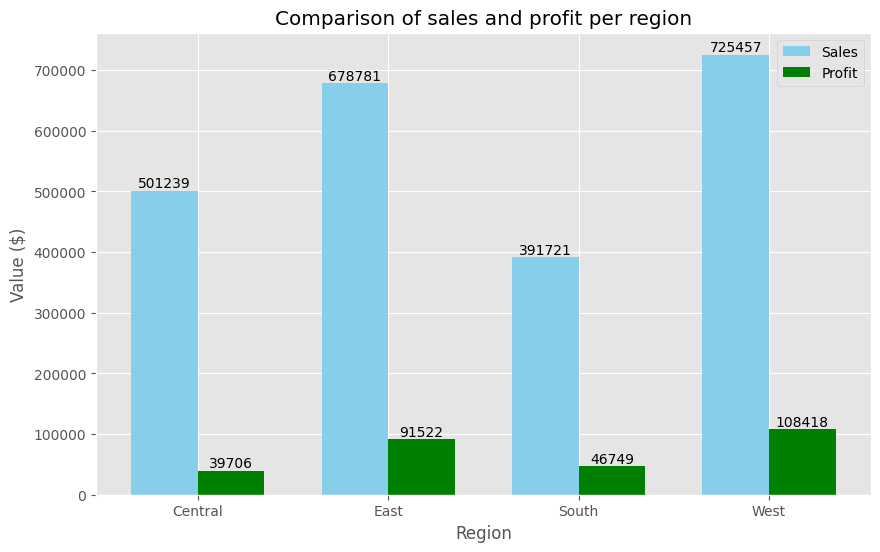

In [241]:
# Comparison of sales and profit per region

# Grouping sales and profit data by segment
df_sum = df.groupby(by=['Region'], as_index=False).agg({"Sales": "sum", "Profit": "sum"}).reset_index()

# Setting the width and position of bars
bar_width = 0.35
bar_positions_sales = np.arange(len(df_sum['Region']))
bar_positions_profit = bar_positions_sales + bar_width

# Setting the width and height of figure
plt.figure(figsize=(10, 6))

# Creating bar chart for Sales
sales_bars = plt.bar(bar_positions_sales, df_sum['Sales'], width=bar_width, label='Sales', color='skyblue')

# Creating bar chart for Profit
profit_bars = plt.bar(bar_positions_profit, df_sum['Profit'], width=bar_width, label='Profit', color='green')

# Adding titles, labels, and bar labels
plt.title('Comparison of sales and profit per region')
plt.ylabel('Value ($)')
plt.xlabel('Region')
plt.xticks(bar_positions_sales + bar_width / 2, df_sum['Region'])
plt.legend()

# Iterate through each bar to label all bars
for bar in sales_bars + profit_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

# Displaying bar charts
plt.show()


The west region generated the highest sales and profit

##State performances ##

**Number of orders from each state**

In [242]:
# Number of orders from each state
state_order = df['State'].value_counts().reset_index()
state_order.columns = ['State','count']
state_order


,State,count
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


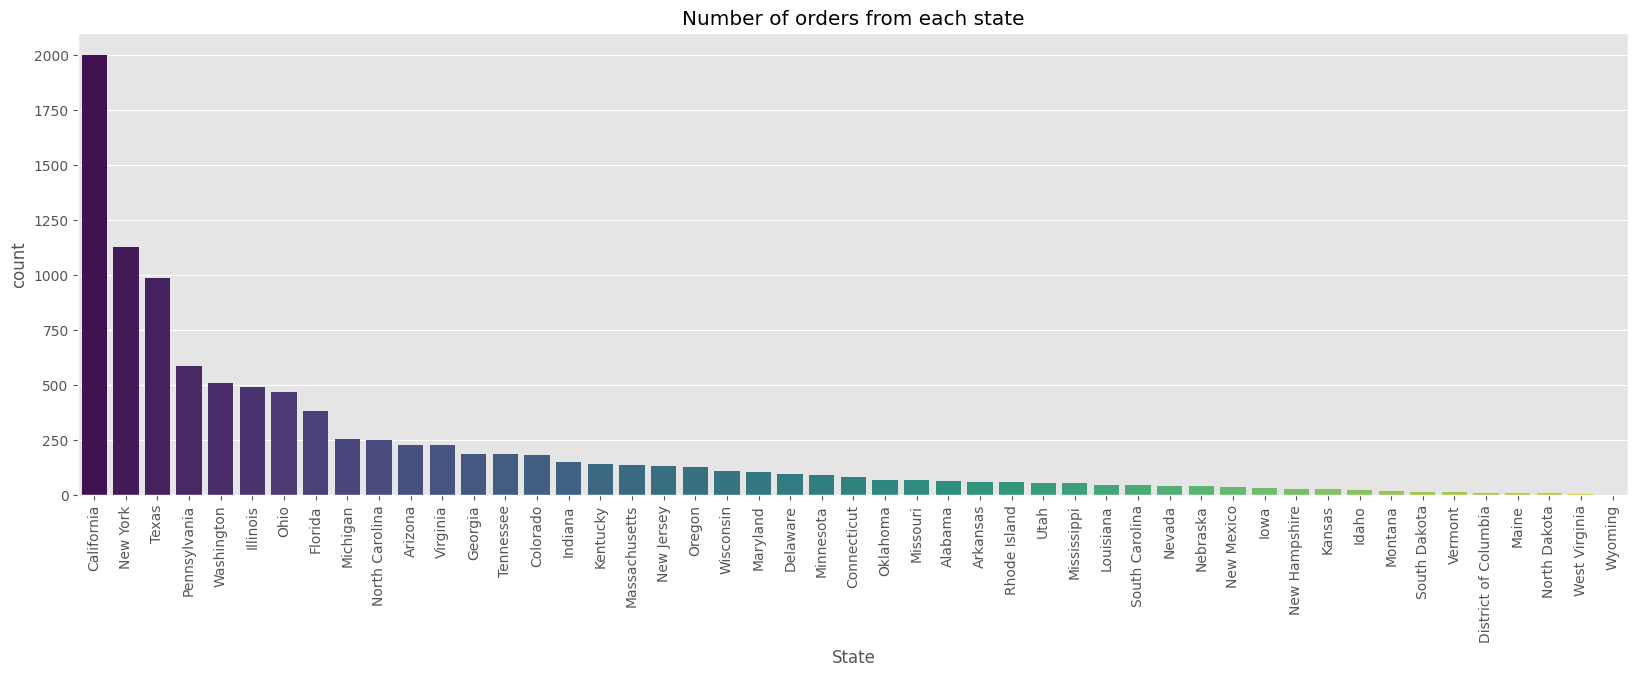

In [243]:
# Setting the width and height of figure
plt.figure(figsize=(20,6))

# Creating bar charts
sns.barplot(x=state_order['State'], y=state_order['count'], hue=state_order['State'], palette='viridis', legend=False)

# Setting titles and labels
plt.title('Number of orders from each state')
plt.ylabel('count')
plt.xlabel('State')
plt.xticks(rotation=90)

# Displaying bar charts
plt.show()


The highest number of orders were coming from states of California, New York, Texas, etc.

**Sales and profit for each state**

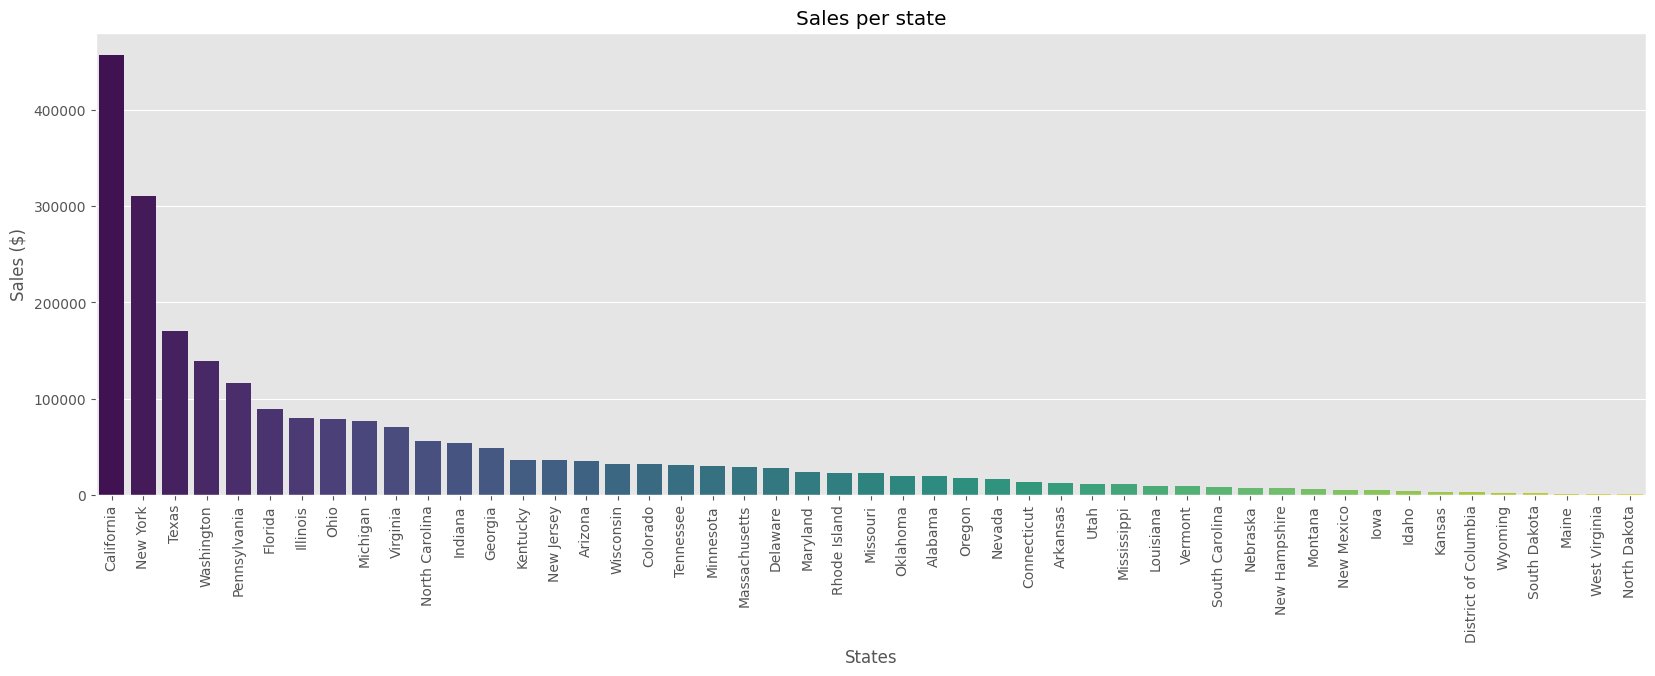

In [244]:
# Sales per state

# Grouping sales data by state
df_sum = df.groupby(by=['State'], as_index=False).agg({"Sales":sum})

# Sorting dataFrame based on the sales in descending way
df_sum = df_sum.sort_values(by='Sales', ascending=False)

# Setting the width and height of figure
plt.figure(figsize=(20,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['State'], y=df_sum['Sales'], hue=df_sum['State'], palette='viridis', legend=False)

# Adding titles, labels, and bar labels
plt.title('Sales per state')
plt.ylabel('Sales ($)')
plt.xlabel('States')
plt.xticks(rotation=90)


# Displaying bar charts
plt.show()

**The top 10 states with the highest total sales**

In [245]:
# The top 10 states with the highest total sales
state_sales_df = pd.pivot_table(data=df[['State', 'Sales']],
                                index=['State'],
                                values='Sales',
                                aggfunc='sum'
).reset_index()
top_10_states_sales = state_sales_df.sort_values(by='Sales', ascending=False).head(10)
top_10_states_sales

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


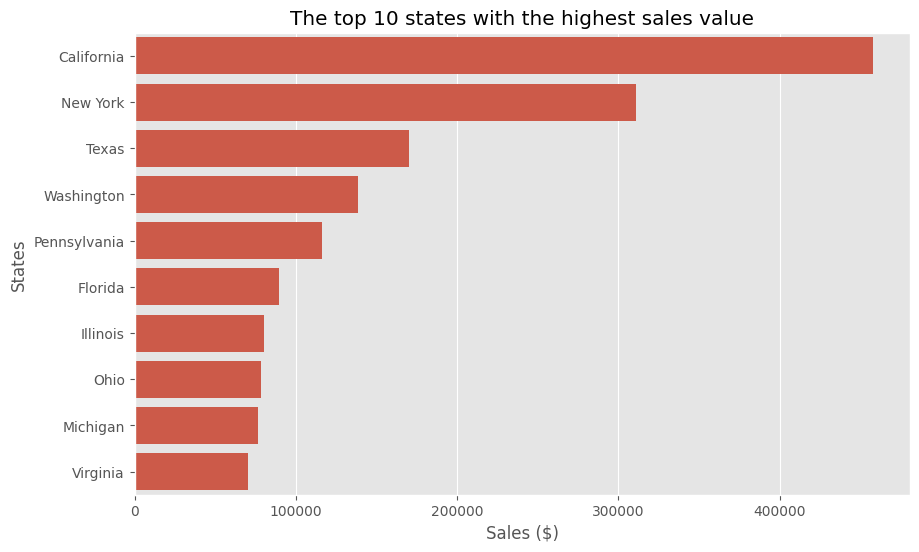

In [246]:
# The 10 top states with the highest sales value

# Setting the width and height of figure
plt.figure(figsize=(10, 6))

# Creating horizontal bar charts
sns.barplot(x='Sales', y='State', data=top_10_states_sales)

# Adding title and labels
plt.title('The top 10 states with the highest sales value')
plt.xlabel('Sales ($)')
plt.ylabel('States')

# Displaying bar charts
plt.show()

**Profit per state**

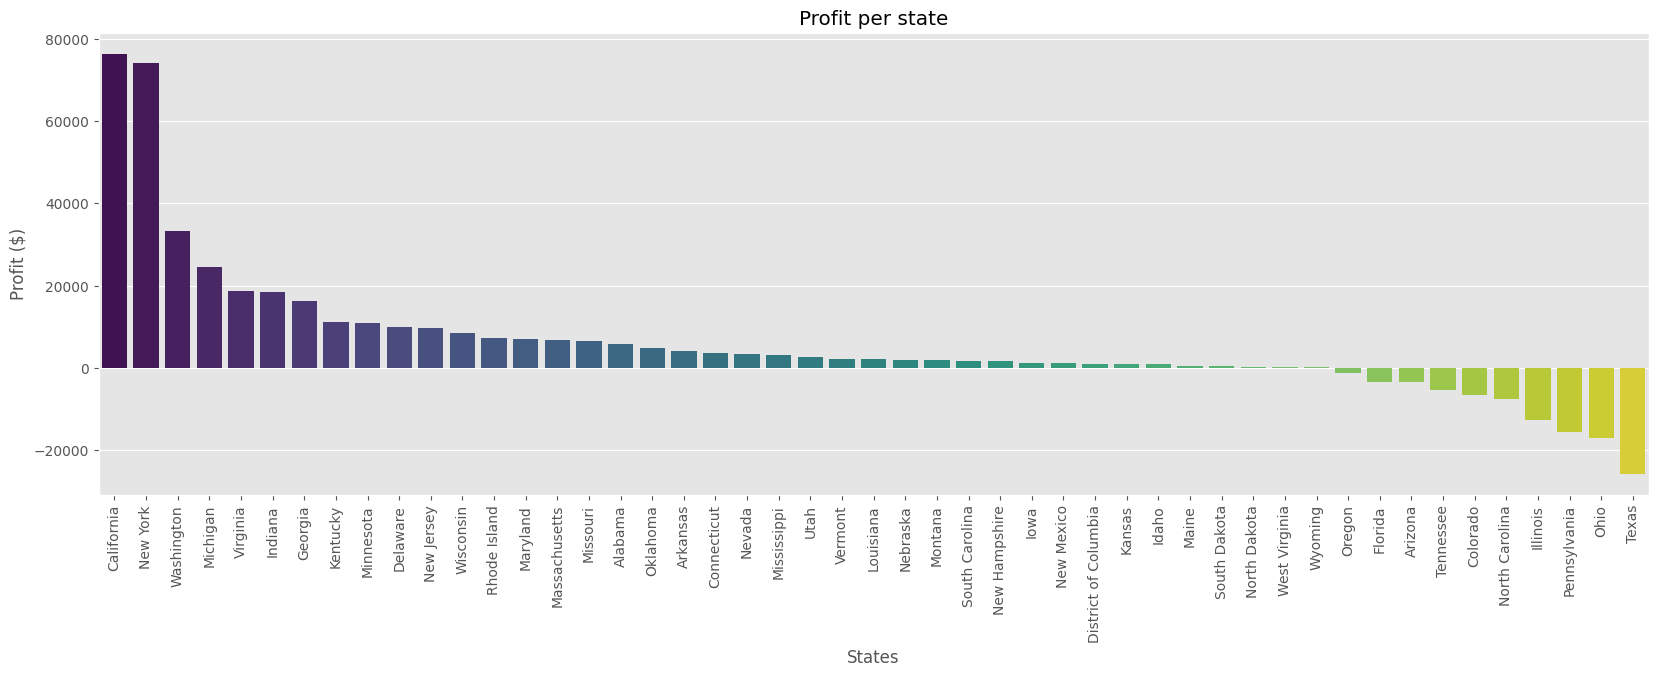

In [247]:
# Profit per state

# Grouping profit data by state
df_sum = df.groupby(by=['State'], as_index=False).agg({"Profit":sum})

# Sorting dataFrame based on the Profit in descending way
df_sum = df_sum.sort_values(by='Profit', ascending=False)

# Setting the width and height of figure
plt.figure(figsize=(20,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['State'], y=df_sum['Profit'], palette = 'viridis')

# Adding titles, labels, and bar labels
plt.title('Profit per state')
plt.ylabel('Profit ($)')
plt.xlabel('States')
plt.xticks(rotation=90)


# Displaying bar charts
plt.show()

**The top 10 most profitable states**

In [248]:
# The top ten most profitable states
state_profit_df = pd.pivot_table(data=df[['State', 'Profit']],
                                index=['State'],
                                values='Profit',
                                aggfunc='sum'
).reset_index()
top_10_states_profit = state_profit_df.sort_values(by='Profit', ascending=False).head(10)
top_10_states_profit

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


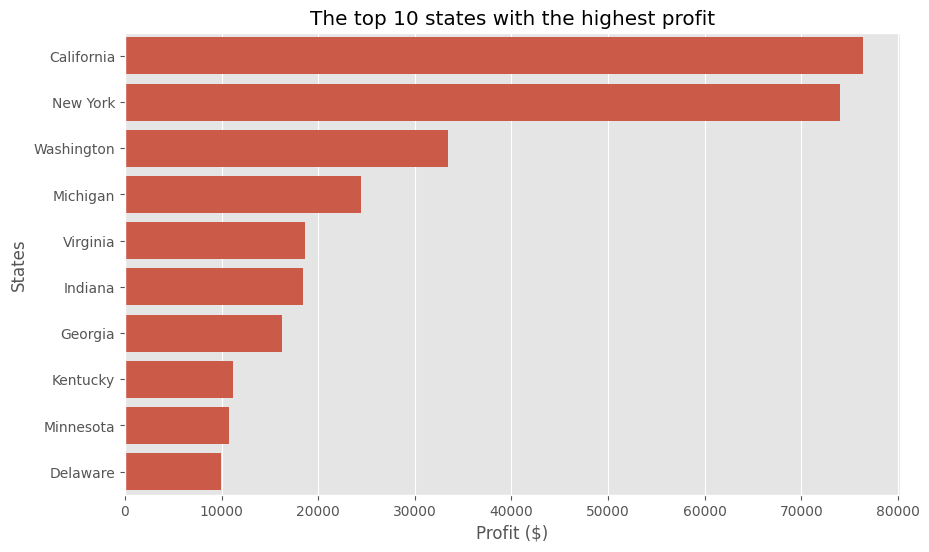

In [249]:
# The 10 top states with the highest profit

# Setting the width and height of figure
plt.figure(figsize=(10, 6))

# Creating horizontal bar charts
sns.barplot(x='Profit', y='State', data=top_10_states_profit)

# Adding title and labels
plt.title('The top 10 states with the highest profit')
plt.xlabel('Profit ($)')
plt.ylabel('States')

# Displaying bar charts
plt.show()

**Sales and profit per each state**

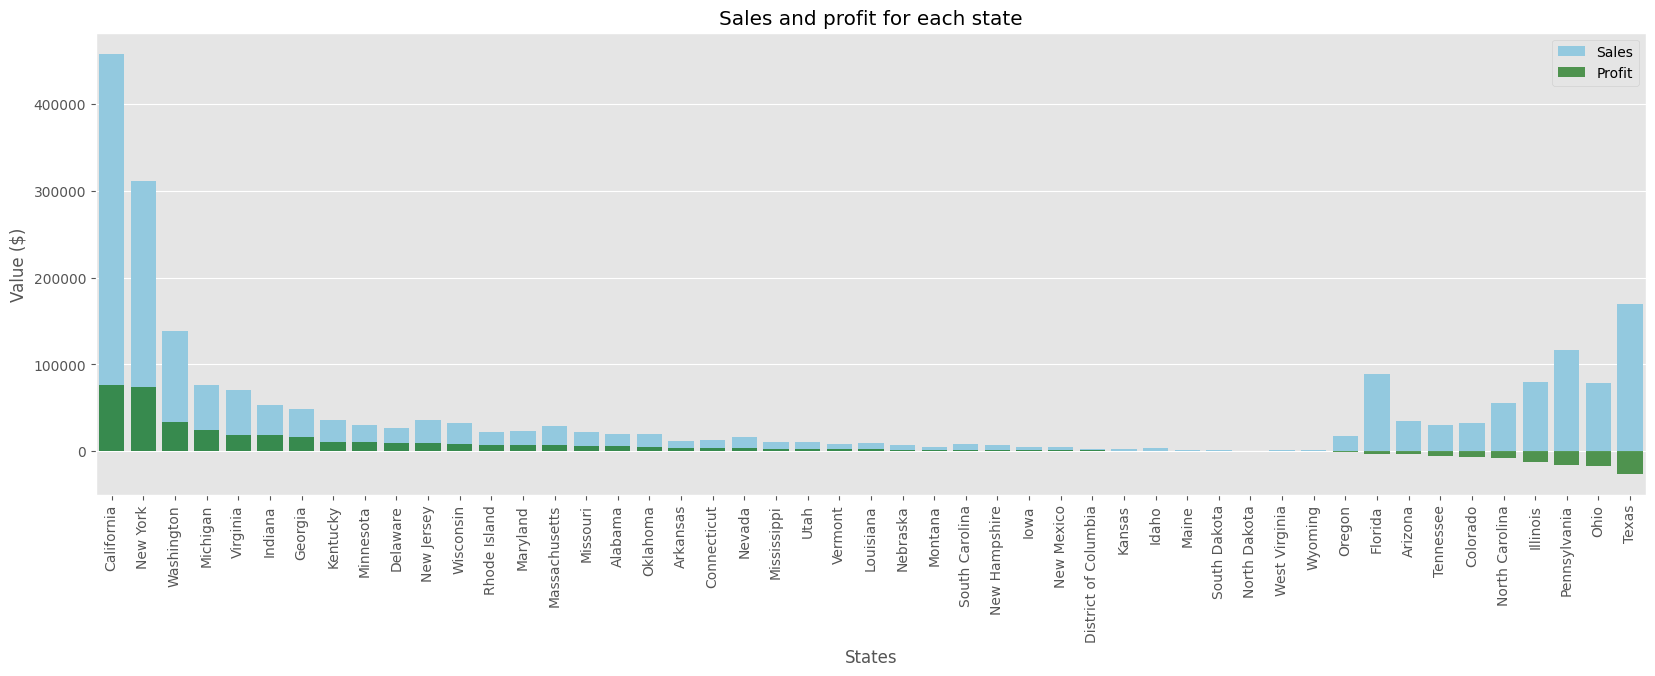

In [250]:
# Sales and profit per state (sorted by profit)

# Grouping sales and profit data by state
profit_sales_state = df.groupby('State')[['Sales','Profit']].sum().reset_index()

# Sorting dataFrame based on the Profit colomn in descending
profit_sales_state = profit_sales_state.sort_values(by='Profit', ascending=False)

# Setting the width and height of figure
plt.figure(figsize=(20,6))

# Creating bar charts
sns.barplot(x='State', y='Sales', data=profit_sales_state, color='skyblue', label='Sales')
sns.barplot(x='State', y='Profit', data=profit_sales_state, color='green', label='Profit', alpha=0.7)

# Adding titles, labels, and legends
plt.title('Sales and profit for each state')
plt.ylabel('Value ($)')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.legend()

# Displaying bar charts
plt.show()

The top ten of the most profitable states from whole regions are coming from California, New York, Washington, Michigan, Virginia, Indiana, Georgia, Kentucky, Minnesota, and Delaware

### Sub-Category

**Number of order per sub category**

In [251]:
# Number of order per sub-category
sub_category_order = df['Sub-Category'].value_counts()
sub_category_order

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

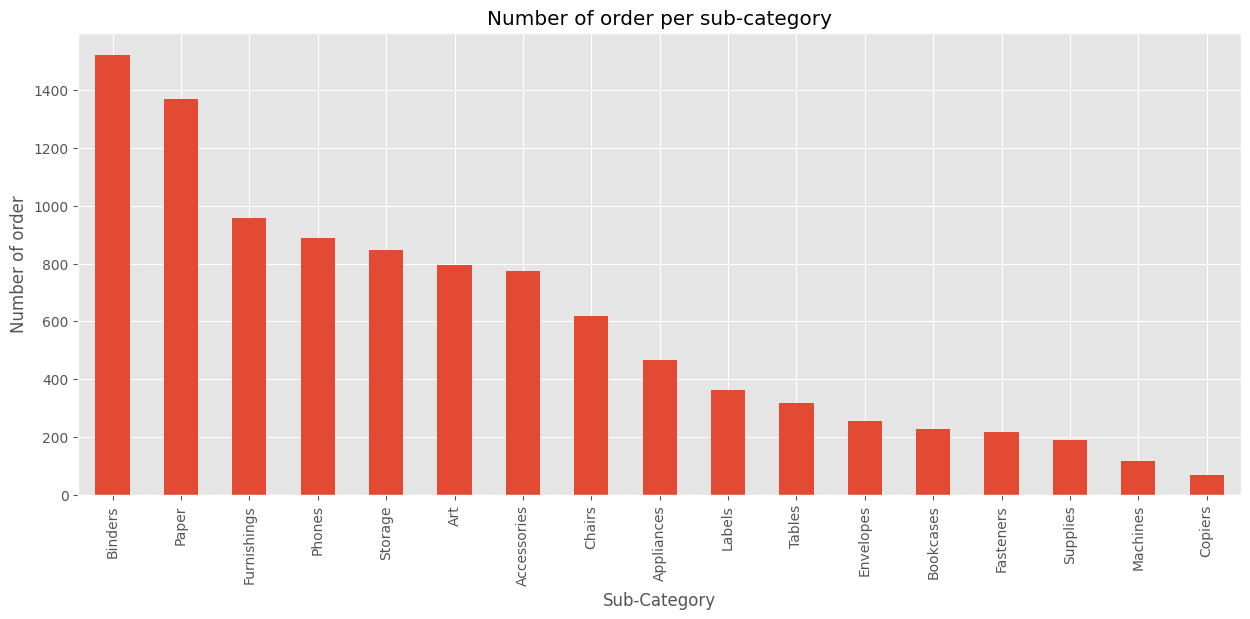

In [252]:
# Number of order per sub-category

# Setting the width and height of figure
plt.figure(figsize=(15,6))

# Creating pie charts and adding value
sub_category_order.plot.bar()

# Adding title and labels
plt.title('Number of order per sub-category')
plt.ylabel('Number of order')

# Displaying pie charts
plt.show()

Binders and paper were the most popular sub-category

**Sales per sub-category**

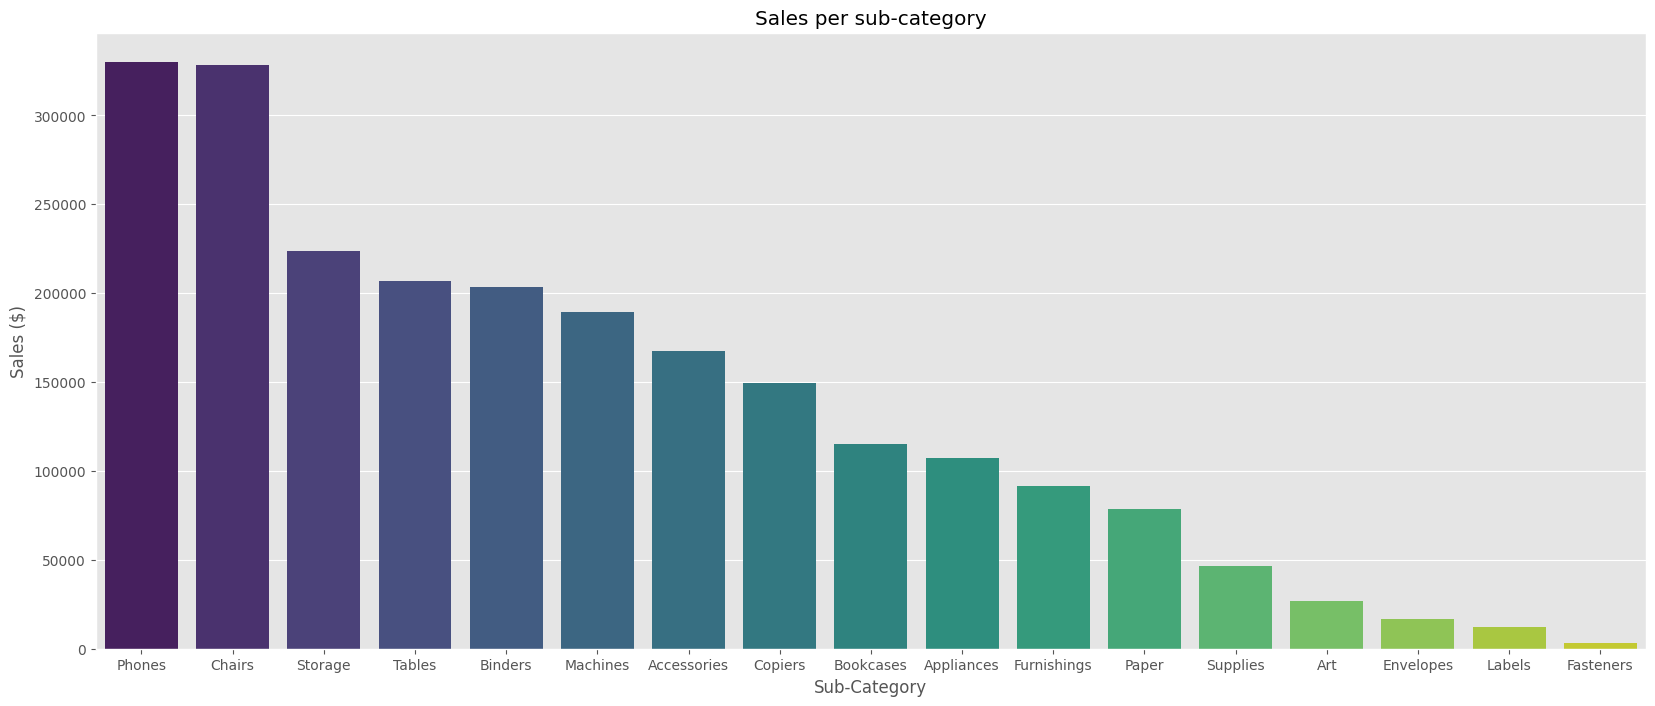

In [253]:
# Sales per sub-category

# Grouping sales data by sub-category
df_sum = df.groupby(by=['Sub-Category'], as_index=False).agg({"Sales":sum})

# Sorting dataFrame based on the sales in descending way
df_sum = df_sum.sort_values(by='Sales', ascending=False)

# Setting the width and height of figure
plt.figure(figsize=(20,8))

# Creating bar charts
ax = sns.barplot(x=df_sum['Sub-Category'], y=df_sum['Sales'], palette = 'viridis')

# Adding titles, labels, and bar labels
plt.title('Sales per sub-category')
plt.ylabel('Sales ($)')
plt.xlabel('Sub-Category')

# Displaying bar charts
plt.show()

**Profit per sub-category**

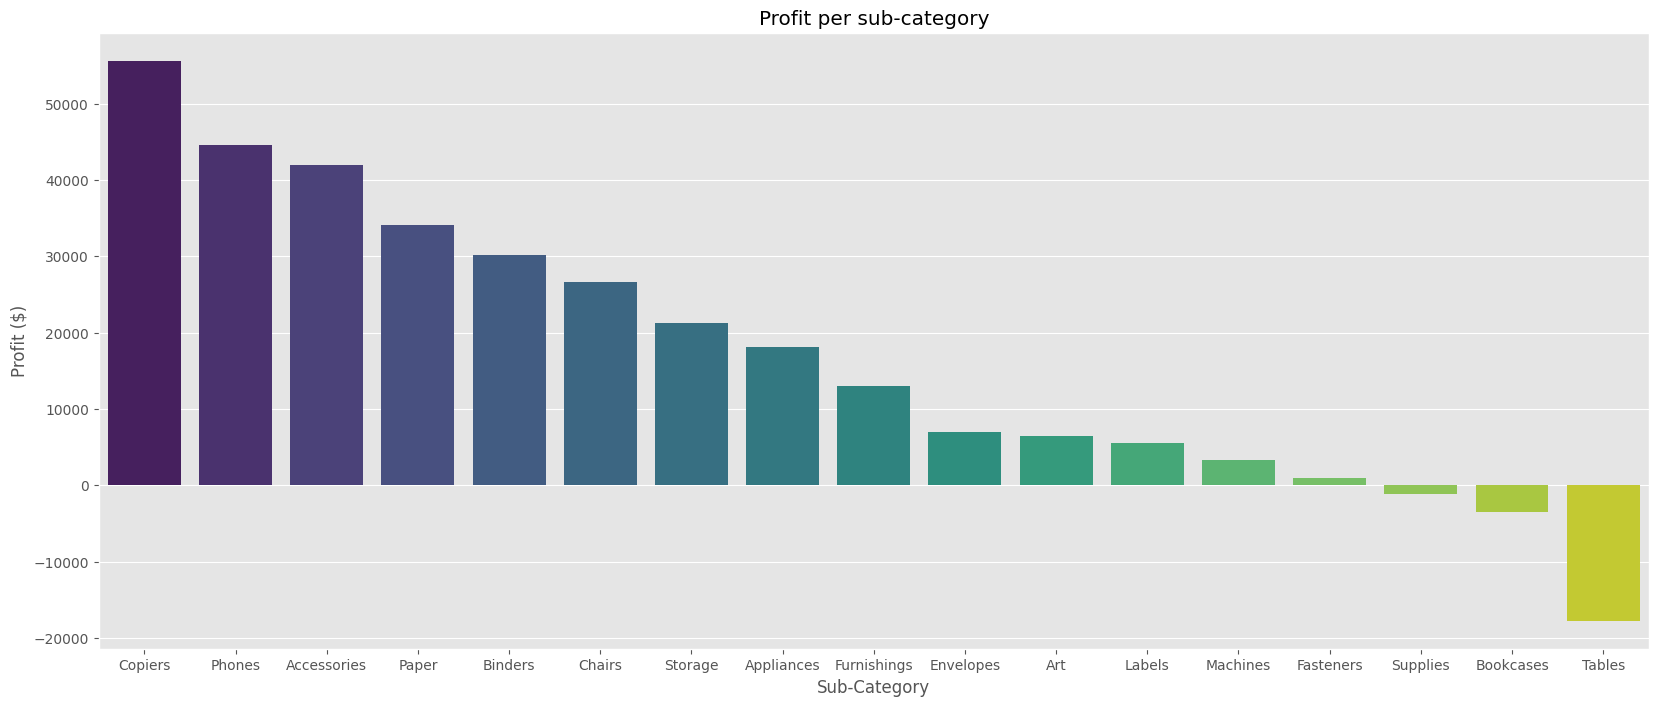

In [254]:
# Profit per sub-category

# Grouping profit data by sub-category
df_sum = df.groupby(by=['Sub-Category'], as_index=False).agg({"Profit":sum})

# Sorting dataFrame based on the sales in descending way
df_sum = df_sum.sort_values(by='Profit', ascending=False)

# Setting the width and height of figure
plt.figure(figsize=(20,8))

# Creating bar charts
ax = sns.barplot(x=df_sum['Sub-Category'], y=df_sum['Profit'], palette = 'viridis')

# Adding titles, labels, and bar labels
plt.title('Profit per sub-category')
plt.ylabel('Profit ($)')
plt.xlabel('Sub-Category')

# Displaying bar charts
plt.show()

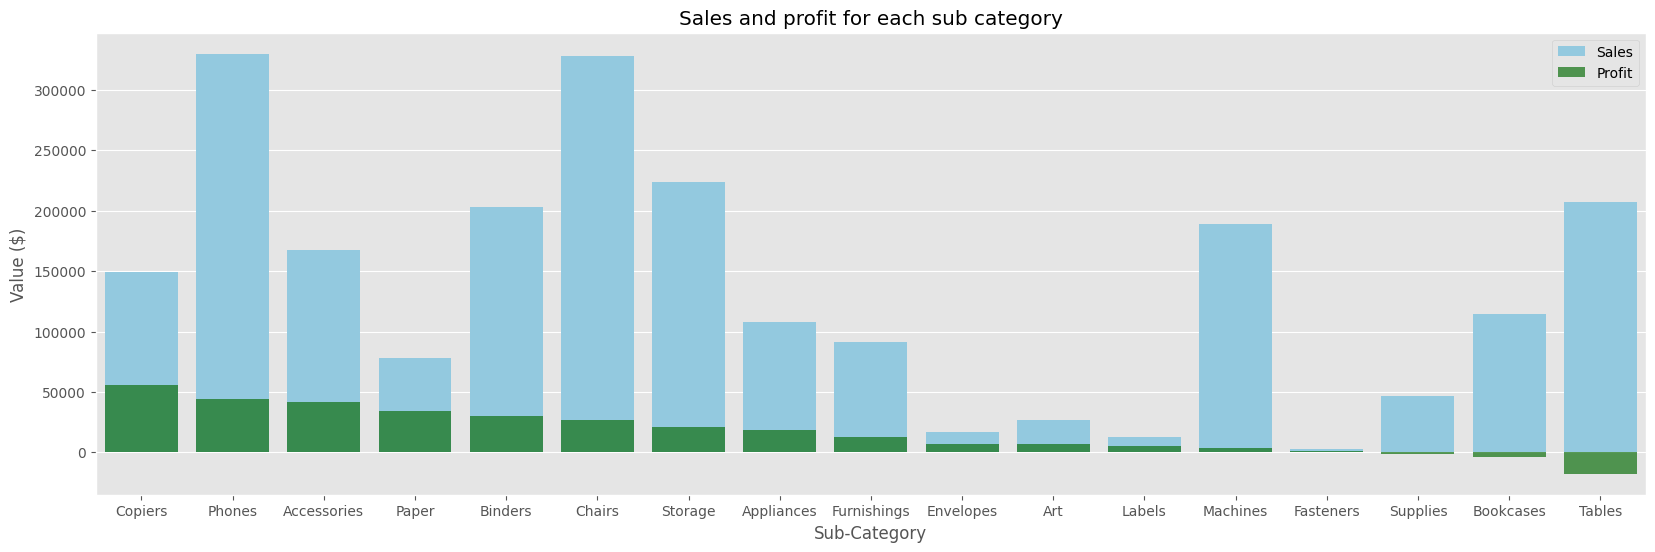

In [255]:
# Sales and profit per sub-category (sorted by profit)

# Grouping sales and profit data by sub-category
profit_sales_subchar = df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index()

# Sorting dataFrame based on the Profit colomn in descending
profit_sales_subchar = profit_sales_subchar.sort_values(by='Profit', ascending=False)

# Setting the width and height of figure
plt.figure(figsize=(20,6))

# Creating bar charts
sns.barplot(x='Sub-Category', y='Sales', data=profit_sales_subchar, color='skyblue', label='Sales')
sns.barplot(x='Sub-Category', y='Profit', data=profit_sales_subchar, color='green', label='Profit', alpha=0.7)

# Adding titles, labels, and legends
plt.title('Sales and profit for each sub category')
plt.ylabel('Value ($)')
plt.xlabel('Sub-Category')
plt.legend()

# Displaying bar charts
plt.show()

Phones and chairs contributed to the highest sales value. However, copiers contributed to be the most profitable sub category


In [256]:
# Sales based on sub-category per region and segment
sub_cat_sales_pv = pd.pivot_table(data=df,
               index=['Category','Sub-Category'],
               columns=['Region','Segment'],
               values='Sales',
               aggfunc='sum'
)
sub_cat_sales_pv

Region                          Central                               East  \
Segment                        Consumer   Corporate Home Office   Consumer   
Category        Sub-Category                                                 
Furniture       Bookcases     12960.854   8389.5008    2806.822  27307.134   
                Chairs        42933.375  27989.5520   14307.719  59645.133   
                Furnishings    9499.990   3143.9560    2610.424  13177.068   
                Tables        20835.000  12562.5930    5757.378  14082.467   
Office Supplies Appliances     9818.721   5224.7590    8538.553  19389.756   
                Art            3272.352   1478.7420    1014.246   3847.198   
                Binders       39693.576   8879.5400    8350.166  31622.610   
                Envelopes      2365.450   1235.9080    1035.514   2095.522   
                Fasteners       422.432    232.1100     123.488    423.698   
                Labels          743.206   1095.1080     613.158   1652.800   
                Paper          7564.020   5952.0020    3975.880   8661.268   
                Storage       24671.810  12656.6040    8601.698  24994.458   
                Supplies       4559.912   4382.9280     524.532   8567.826   
Technology      Accessories   19062.304   6195.2380    8698.534  22861.056   
                Copiers        4519.884  29679.7420    3059.944  30399.706   
                Machines      11999.762  11716.7340    3080.888  30668.429   
                Phones        37108.786  17180.7960   18113.700  51512.038   

Region                                                   South              \
Segment                       Corporate Home Office   Consumer   Corporate   
Category        Sub-Category                                                 
Furniture       Bookcases     13168.932    3343.268   8716.562   1153.8040   
                Chairs        23505.230   13110.320  26804.226  11366.8720   
                Furnishings    9983.326    5910.986  10870.574   4504.6800   
                Tables        17551.558    7505.782  24408.842  12619.6755   
Office Supplies Appliances    10981.264    3817.446   8287.354  10123.6360   
                Art            2278.402    1360.164   2654.756   1332.4040   
                Binders       12048.381    9827.006  18617.703  11827.6320   
                Envelopes      1579.266     701.086   1191.558   1470.9040   
                Fasteners       286.092     109.928    276.416     80.6340   
                Labels          508.586     441.548   1868.222    365.2260   
                Paper          5975.116    5536.218   7603.272   3345.3220   
                Storage       30968.370   15649.756  16881.746  11362.2580   
                Supplies       1849.258     343.032   2123.554   6022.1540   
Technology      Accessories   11747.998   10424.318  11651.564  10175.4560   
                Copiers        4219.914   18599.842   4439.868   4859.8880   
                Machines      23892.036   11545.700  18338.550  12001.1550   
                Phones        29865.618   19237.326  30846.204  19274.2320   

Region                                         West                          
Segment                      Home Office   Consumer   Corporate Home Office  
Category        Sub-Category                                                 
Furniture       Bookcases      1028.9960  19648.179  11293.6875    5062.257  
                Chairs         7005.3480  43480.008  36279.2240   22022.096  
                Furnishings    1931.4300  16072.414   7369.3040    6631.012  
                Tables         6887.6745  40607.486  28137.8910   16009.185  
Office Supplies Appliances     1114.3360  15323.750  10259.0240    4653.562  
                Art             668.4620   4477.624   3500.9000    1233.542  
                Binders        6585.0060  28227.120  18804.7600    8929.233  
                Envelopes       683.0940   2118.616   1656.5920     342.892  
                Fast

In [257]:
# Profit based on sub-category per segment and region
sub_cat_profit_pv = pd.pivot_table(data=df,
               index=['Category','Sub-Category'],
               columns=['Region','Segment'],
               values='Profit',
               aggfunc='sum'
)
sub_cat_profit_pv

Region                          Central                               East  \
Segment                        Consumer   Corporate Home Office   Consumer   
Category        Sub-Category                                                 
Furniture       Bookcases    -1497.1260   -382.7121   -118.0662 -2192.0672   
                Chairs        2920.9013   3206.8837    464.9371  4917.3952   
                Furnishings  -1454.0524  -1209.3583  -1242.8061  3021.1370   
                Tables       -3964.1571    707.1806   -302.6739 -3708.3528   
Office Supplies Appliances   -3775.6065   -459.2306   1596.2196  5008.7579   
                Art            605.5615    343.9693    245.6283   989.0642   
                Binders       1832.3210  -4420.4249   1544.4670  6740.6697   
                Envelopes      912.6616    483.6642    381.2025   881.8797   
                Fasteners      128.1477     78.5563     29.9146   149.1730   
                Labels         334.2023    487.1700    251.7071   733.5290   
                Paper         2914.6377   2399.2305   1658.0323  3917.3307   
                Storage        413.3101   1084.5102    472.0162  1973.9242   
                Supplies      -782.0922    101.8498     18.3543 -1171.6357   
Technology      Accessories   3743.3859   1462.9337   2045.3110  5240.0783   
                Copiers       1482.9616  12789.9043   1335.9754  8657.9325   
                Machines     -1667.0280   -361.5044    542.4658 -1296.0850   
                Phones        6416.0196   2391.2797   3515.7274  7328.2536   

Region                                                   South             \
Segment                       Corporate Home Office   Consumer  Corporate   
Category        Sub-Category                                                
Furniture       Bookcases      964.9630     59.4724  1220.0120    68.3666   
                Chairs        2720.5878   1719.7876  4017.0347  1183.9545   
                Furnishings   1956.2306    904.0395  1957.1855  1087.9331   
                Tables       -5299.6557  -2017.3716 -2577.4996 -1388.2239   
Office Supplies Appliances    2607.2872    775.3683  1455.2632  2543.8218   
                Art            566.1716    344.7085   648.4543   264.2543   
                Binders       2833.0034   1694.2615  1583.9285  2496.2001   
                Envelopes      663.5852    266.9441   503.4307   643.3798   
                Fasteners       76.4704     38.3474   114.2714    27.5699   
                Labels         218.6299    177.1211   840.9038   150.4372   
                Paper         2668.9582   2429.0821  3085.3364  1410.0633   
                Storage       3836.4565   2578.9905   888.6697   718.5711   
                Supplies       -12.8974     29.3979    69.8592  -111.6379   
Technology      Accessories   2933.5911   3022.1950  2788.3072  3085.4777   
                Copiers       1134.9765   7229.9328  1783.9452  1874.9615   
                Machines      2624.6023   5600.1256  2910.5588 -2520.1179   
                Phones        3129.6183   1856.8141  5623.9118  3680.2120   

Region                                          West                         
Segment                      Home Office    Consumer  Corporate Home Office  
Category        Sub-Category                                                 
Furniture       Bookcases        51.1132  -1966.4570   -12.1673    332.1126  
                Chairs         1411.1001   1380.0007  1233.2305   1414.3531  
                Furnishings     397.5643   4395.1526  1673.4023   1572.7155  
                Tables         -657.3344    521.9717  1074.2004   -113.5648  
Office Supplies Appliances      124.8546   4293.5136  2738.0168   1229.7395  
                Art             145.8780   1211.2211   830.2525    332.6234  
                Binders        -179.4646   7838.6780  5468.5415   2789.5821  
                Envelopes       318.6665    966.4406   780.5998    161.7220  
                Fasteners        31.8768

More detailed explanations of which sub-category or product groups that experienced profit/loss based on their market segments and regions

Copiers, phones, and accesories contributed as the most profitable product groups or sub-category in Superstore.  
The highest sales come from chairs and phones product groups.
The loss of the company mainly contributed by the product groups of tables, bookcases, and supplies.

### Quantity

**Quantity of products per category and subcategory**

In [258]:
product_quantity_pv = pd.pivot_table(data=df[['Category', 'Sub-Category', 'Quantity']],
                                  index=['Category', 'Sub-Category'],
                                  values='Quantity',
                                  aggfunc='sum'
)
product_quantity_pv

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

**Quantity of product per category**

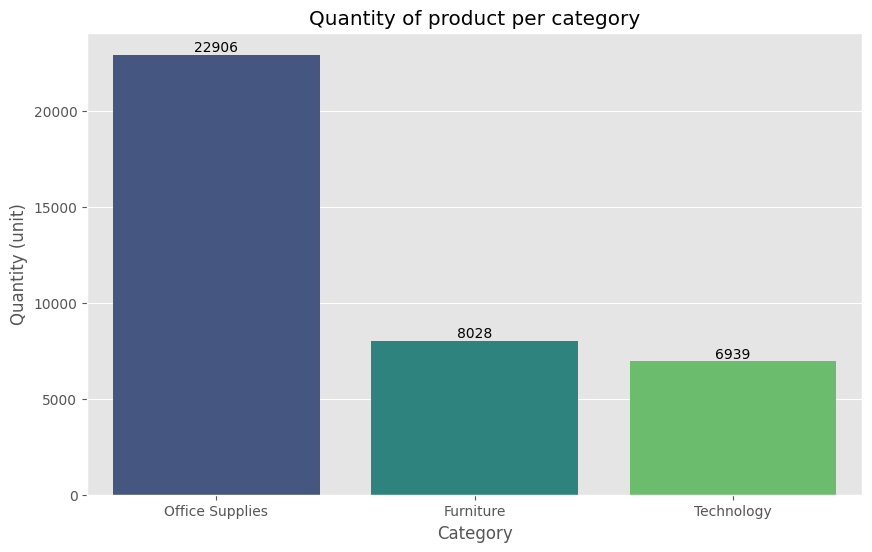

In [259]:
# The highest number of products in quantity
# The most sold products in quantity

# Grouping sales data by category
df_sum = df.groupby(by=['Category'], as_index=False).agg({"Quantity":sum})

# Sorting dataFrame based on the quantity in descending
df_sum = df_sum.sort_values(by='Quantity', ascending=False)

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['Category'], y=df_sum['Quantity'], palette = 'viridis')

# Adding titles, labels, and bar labels
plt.title('Quantity of product per category')
plt.ylabel('Quantity (unit)')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Displaying bar charts
plt.show()

**Quantity of product per subcategory**

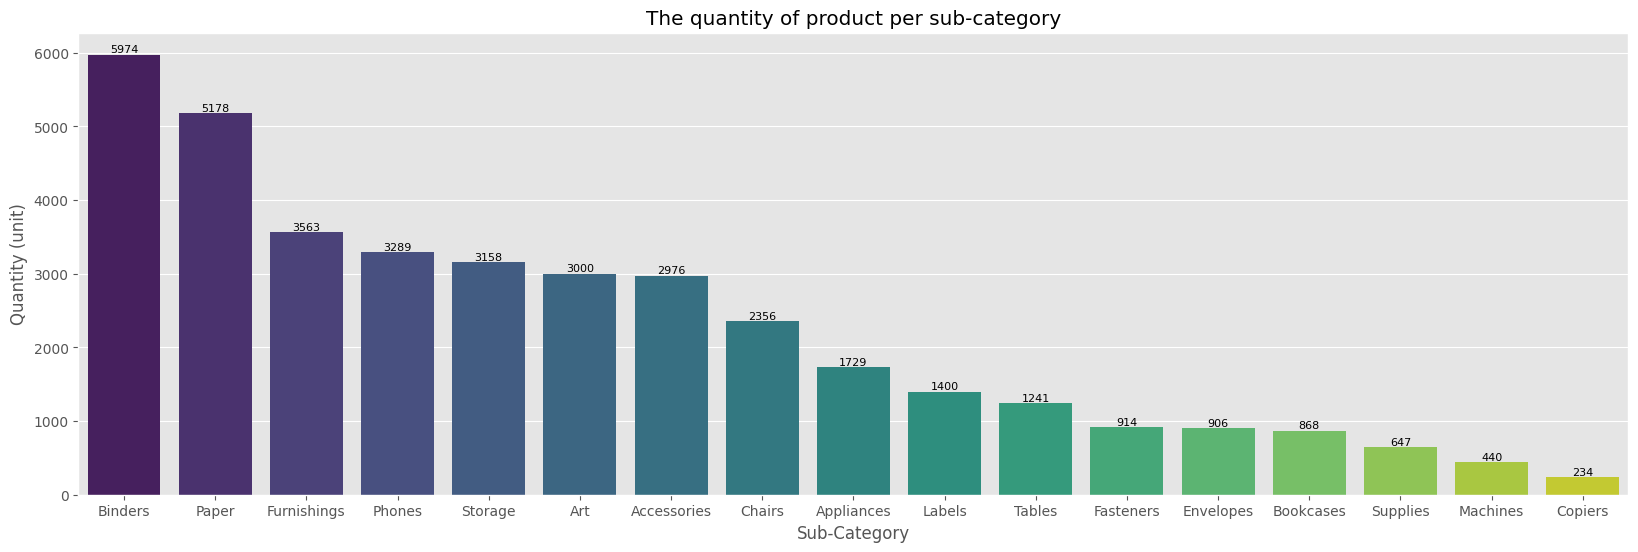

In [260]:
# The highest number of products in quantity
# The most sold products in quantity

# Grouping sales data by sub-category
df_sum = df.groupby(by=['Sub-Category'], as_index=False).agg({"Quantity":sum})

# Sorting dataFrame based on the quantity in descending
df_sum = df_sum.sort_values(by='Quantity', ascending=False)

# Setting the width and height of figure
plt.figure(figsize=(20,6))

# Creating bar charts
ax = sns.barplot(x=df_sum['Sub-Category'], y=df_sum['Quantity'], palette = 'viridis')

# Adding titles, labels, and bar labels
plt.title('The quantity of product per sub-category')
plt.ylabel('Quantity (unit)')

# Iterate through each container to label all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# Displaying bar charts
plt.show()

Binders and papers are the most sold sub-categories or group of  products in quantity




### Product insights


**The top 10 most orderdered products**

In [261]:
# The Top 10 of product orders
product_sort10 = df['Product_Name'].value_counts().reset_index()
product_sort10.columns = ['Product_Name','count']
top_10_products_order = product_sort10.sort_values(by='count', ascending=False).head(10)
top_10_products_order

,Product_Name,count
0,Staple envelope,48
2,Staples,46
1,Easy-staple paper,46
3,Avery Non-Stick Binders,20
4,Xerox 1881,19
5,Staples in misc. colors,19
6,Logitech P710e Mobile Speakerphone,18
7,Staple remover,18
8,DAX Wood Document Frame,18
9,KI Adjustable-Height Table,18


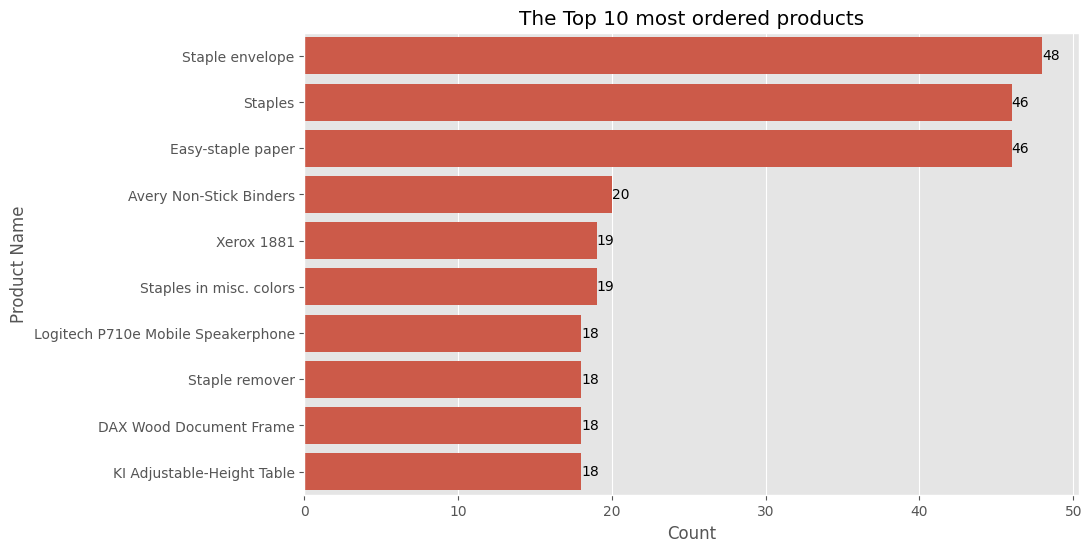

In [262]:
# The top 10 most ordered products

# Membuat bar horizontal dengan seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='Product_Name', data=top_10_products_order)

# Adding title and labels
plt.title('The Top 10 most ordered products')
plt.xlabel('Count')
plt.ylabel('Product Name')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Displaying bar charts
plt.show()


**The top 10 products with the highest sales value**

In [263]:
# The top 10 products with the highest sales value
product_sales_max = pd.pivot_table(data=df[['Product_Name', 'Sales']],
                                   index=['Product_Name'],
                                   values='Sales',
                                   aggfunc='max'
).reset_index()
top_10_products_sales = product_sales_max.sort_values(by='Sales', ascending=False).head(10)
top_10_products_sales

,Product_Name,Sales
439,Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
399,Canon imageCLASS 2200 Advanced Copier,17499.950
675,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
881,Ibico EPK-21 Electric Binding System,9449.950
19,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
773,"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",8749.950
799,High Speed Automatic Electric Letter Opener,8187.650
969,Lexmark MX611dhe Monochrome Laser Printer,8159.952
471,Cubify CubeX 3D Printer Triple Head Print,7999.980
638,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,6354.950


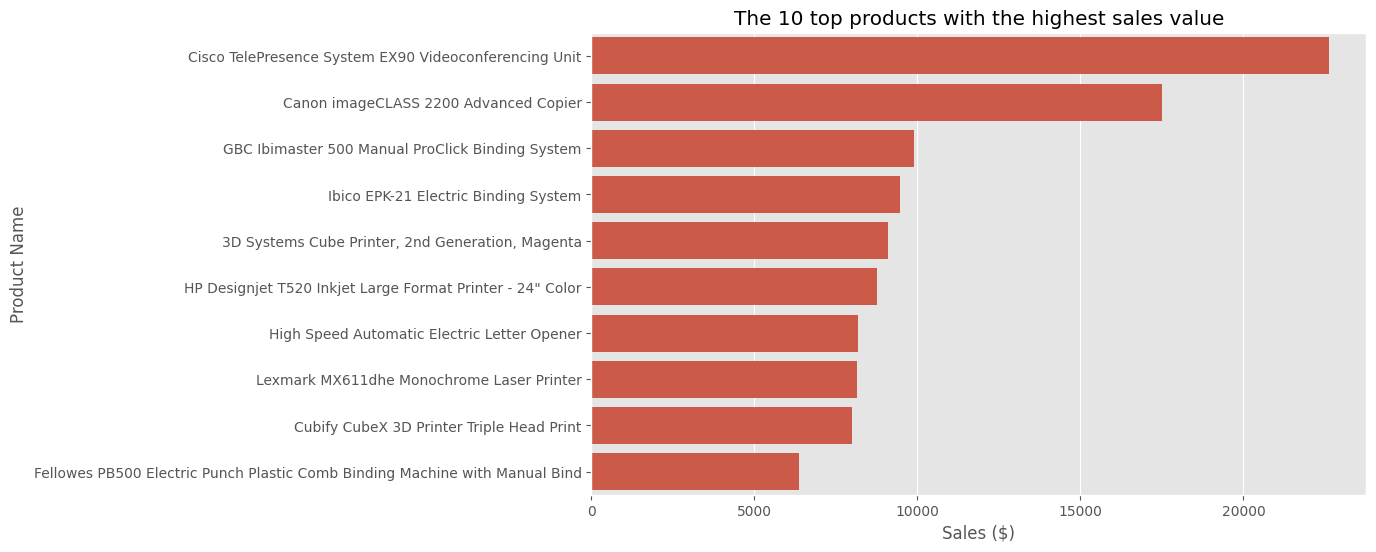

In [264]:
# The 10 top products with the highest sales value

# Setting the width and height of figure
plt.figure(figsize=(10, 6))

# Creating horizontal bar charts
sns.barplot(x='Sales', y='Product_Name', data=top_10_products_sales)

# Adding title and labels
plt.title('The 10 top products with the highest sales value')
plt.xlabel('Sales ($)')
plt.ylabel('Product Name')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Displaying bar charts
plt.show()

**The top 10 most profitable products**

In [265]:
# The top 10 most profitable products
product_profit_max = pd.pivot_table(data=df[['Product_Name', 'Profit']],
                                   index=['Product_Name'],
                                   values='Profit',
                                   aggfunc='max'
).reset_index()
top_10_products_profit = product_profit_max.sort_values(by='Profit', ascending=False).head(10)
top_10_products_profit

,Product_Name,Profit
399,Canon imageCLASS 2200 Advanced Copier,8399.9760
675,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700
881,Ibico EPK-21 Electric Binding System,4630.4755
638,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,3177.4750
773,"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",2799.9840
791,Hewlett Packard LaserJet 3310 Copier,2591.9568
670,GBC DocuBind P400 Electric Binding System,2504.2216
162,Ativa V4110MDD Micro-Cut Shredder,2400.9657
19,"3D Systems Cube Printer, 2nd Generation, Magenta",2365.9818
395,Canon PC1060 Personal Laser Copier,2302.9671


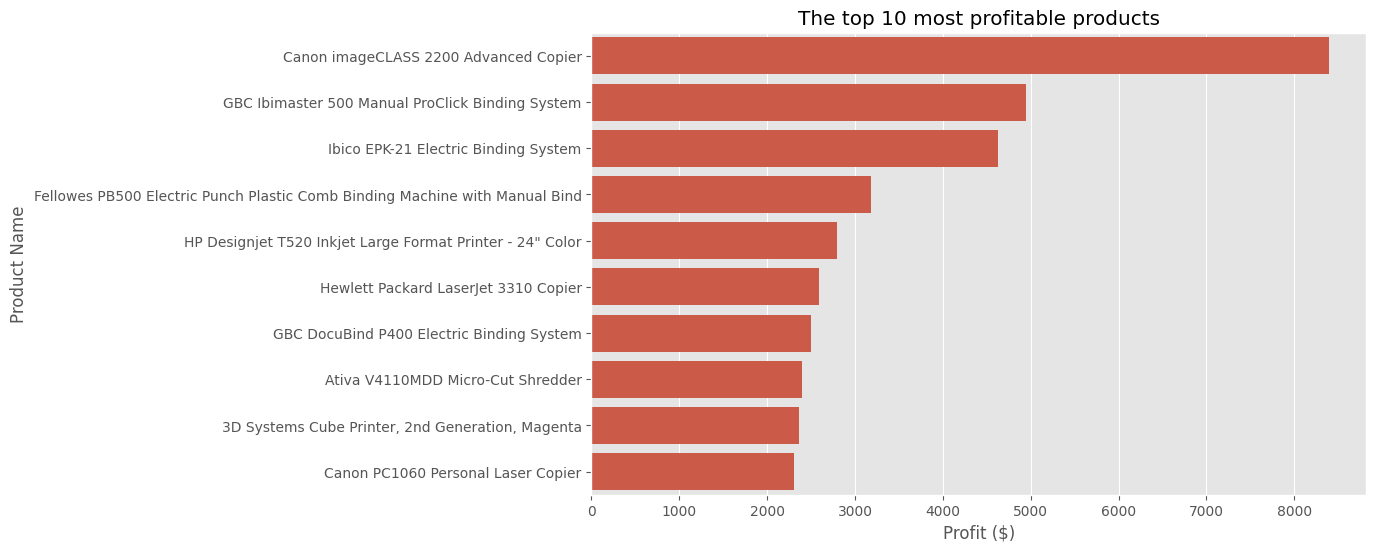

In [266]:
# The top 10 most profitable products

# Setting the width and height of figure
plt.figure(figsize=(10, 6))

# Creating horizontal bar charts
sns.barplot(x='Profit', y='Product_Name', data=top_10_products_profit)

# Adding title and labels
plt.title('The top 10 most profitable products')
plt.xlabel('Profit ($)')
plt.ylabel('Product Name')

# Displaying bar charts
plt.show()

**The top 10 lowest profitable products**

In [267]:
# The top 10 lowest profitable products
product_profit_min = pd.pivot_table(data=df[['Product_Name', 'Profit']],
                                   index=['Product_Name'],
                                   values='Profit',
                                   aggfunc='min'
).reset_index()
top_10_products_profitloss = product_profit_min.sort_values(by='Profit', ascending=False).tail(10)
top_10_products_profitloss

,Product_Name,Profit
673,GBC DocuBind TL300 Electric Binding System,-1480.0335
1328,"Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish",-1665.0522
439,Cisco TelePresence System EX90 Videoconferencing Unit,-1811.0784
420,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-1862.3124
638,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,-2287.7820
881,Ibico EPK-21 Electric Binding System,-2929.4845
969,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800
670,GBC DocuBind P400 Electric Binding System,-3701.8928
471,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
470,Cubify CubeX 3D Printer Double Head Print,-6599.9780


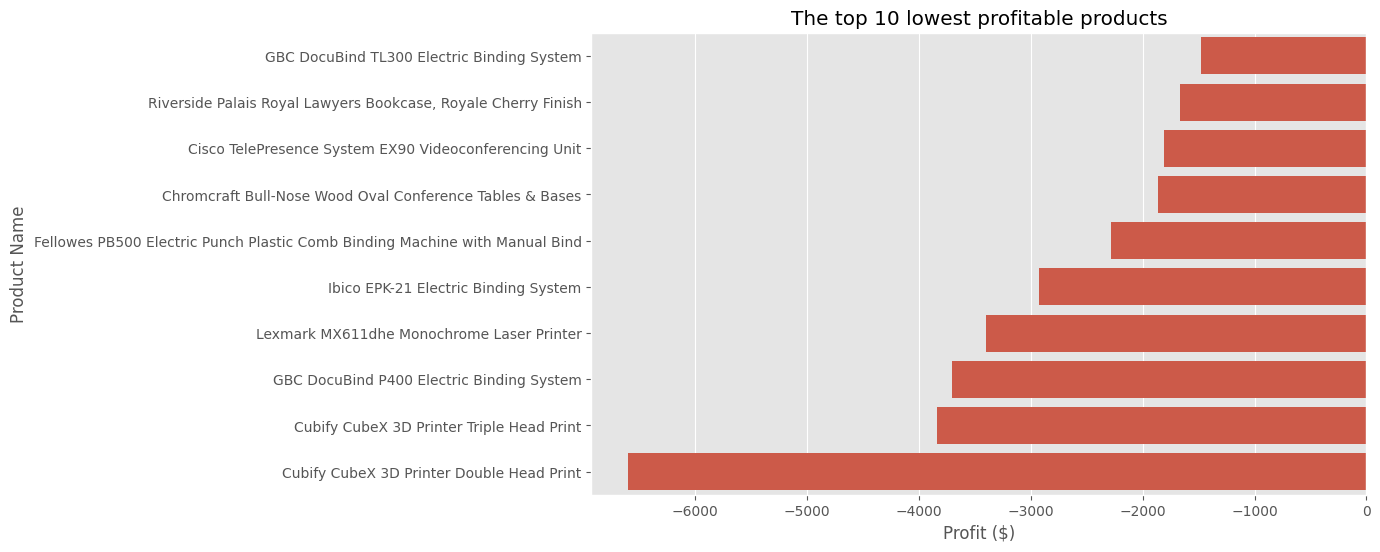

In [268]:
# The top 10 lowest profitable products

# Setting the width and height of figure
plt.figure(figsize=(10, 6))

# Creating horizontal bar charts
sns.barplot(x='Profit', y='Product_Name', data=top_10_products_profitloss)

# Adding title and labels
plt.title('The top 10 lowest profitable products')
plt.xlabel('Profit ($)')
plt.ylabel('Product Name')

# Displaying bar charts
plt.show()

In [269]:
# The top product with the highest quantity per order
product_quantity_max = pd.pivot_table(data=df[['Product_Name', 'Quantity']],
                                   index=['Product_Name'],
                                   values='Quantity',
                                   aggfunc='max'
).reset_index()
product_quantity_max.sort_values(by='Quantity', ascending=False).head(10)

,Product_Name,Quantity
1180,"OIC Colored Binder Clips, Assorted Sizes",14
573,Eldon ProFile File 'N Store Portable File Tub Letter/Legal Size Black,14
751,"Global Push Button Manager's Chair, Indigo",14
1013,Longer-Life Soft White Bulbs,14
1444,"Southworth 100% Résumé Paper, 24lb.",14
1475,Staples in misc. colors,14
1057,Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive,14
1065,"Metal Folding Chairs, Beige, 4/Carton",14
1560,Ultra Door Push Plate,14
149,Anker Ultra-Slim Mini Bluetooth 3.0 Wireless Keyboard,14


# Insights and Recommendations

**Shipping mode**
* The most popular shipping mode is the standard class. It is recommended to improve the standard class quality of service to maintain good relationship with customers and improve customer loyalty

**Market segment**
* The highest number of order was dominated by private consumer segment. Furthermore, this segment generated the highest sales and profit of superstore.

**Category and sub-category**
* Office supplies were the most popular or the most ordered in category criteria. Moreover, Binders and paper were the most popular sub-category. However, the technology category contributed to highest value of sales and the most profitable. It is recommended to improve the sales strategy of items from technology to generate more profit for the company.

**Geographical insights**
* West region contributed to the highest number of order and generated the highest sales and profit contribution to the Superstore. From the whole states, California and New York contributed to the highest number of order and have the highest sales and profit. It is recommended to explore more the top performing states strategy as lesson learnt and to be adapted in the less performing states

**Sales and profit trends**
* From 2017-01 to 2021-12, there were sales and profit  increase up to 588,8% and 346.2%. Noticeable yearly pattern of sales increase to the peak, 4th quarter, between October and December. It is recommended to stock more products near the end of the year

**Product insights**
* Phones and chairs contributed to the highest sales value. However copiers contributed to be the most profitable sub category. It is recommended to stock more the top ten most ordered products, especially during the peak season and conduct more marketing for them in the less performance area. It is also recommended to improve the marketing process/strategy to sell more the top 10 most profitable products, to get more profit. It is recommended to fix or to eliminate the least profitable products, especially that cause some losses to the company



# Data visualization

* Data visualization (via Google Looker Studio): https://lookerstudio.google.com/s/lypphXB5H54
* Data visualization (via Tableau): https://public.tableau.com/views/DashboardSuperstore_17113433910810/Summary?:language=en-GB&:sid=&:display_count=n&:origin=viz_share_link  